# Setup locale

In [27]:
# Import necessary libraries for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configure visualization settings
sns.set_theme(style="whitegrid")
sns.set_context("notebook", font_scale=1.5)

# Path su linux
file_path = './data/Dataset3_PortfolioReplicaStrategy.xlsx'

# Path su windows - comando da inserire 
#file_path = "C:/Users/pc/Desktop/politecnico/b-FINTECH/business cases/Fintech_BC/BC2/data/Dataset2_Needs.xls"

# Data Preprocessing


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the Excel file with specific structure:
# - Row 4 contains full names
# - Row 6 contains Bloomberg tickers (note: Excel is 1-indexed, pandas is 0-indexed)
# - Data starts from row 7

# Read full names (row 4)
full_names_df = pd.read_excel(file_path, header=None, skiprows=3, nrows=1)
full_names = full_names_df.iloc[0].tolist()[1:]  # Skip the first column (date column)

# Read Bloomberg tickers (row 6)
tickers_df = pd.read_excel(file_path, header=None, skiprows=5, nrows=1)
tickers = tickers_df.iloc[0].tolist()[1:]  # Skip the first column (date column)

# Create a dictionary mapping tickers to full names
variable_info = dict(zip(tickers, full_names))

# Read the actual data without using any row as a header
data_raw = pd.read_excel(file_path, header=None, skiprows=6)

# First column is the date column
data_raw.columns = ['Date'] + tickers  # Assign the columns correctly using tickers

# Set the date column as the index and ensure it's in datetime format
data_raw['Date'] = pd.to_datetime(data_raw['Date'], format='%d/%m/%Y')
data = data_raw.set_index('Date')

# Display the first few rows to examine the dataset structure
print("Dataset preview:")
display(data.head())

# Show the variable information (Ticker -> Full Name)
print("\nVariable Information (Bloomberg Ticker -> Full Name):")
for ticker, name in variable_info.items():
    print(f"{ticker} -> {name}")

# Show basic information about the dataset
print("\nDataset information:")
display(data.info())

# Display statistical summary of the dataset
print("\nBasic statistics:")
display(data.describe())


Dataset preview:


,MXWO Index,MXWD Index,LEGATRUU Index,HFRXGL Index,RX1 Comdty,TY1 Comdty,GC1 Comdty,CO1 Comdty,ES1 Comdty,VG1 Comdty,NQ1 Comdty,LLL1 Comdty,TP1 Comdty,DU1 Comdty,TU2 Comdty
Date,,,,,,,,,,,,,,,
2011-03-16,1260.15,324.03,430.7737,1218.60,123.65,122.468750,1396.1,110.62,99.79,146.6,99.93,1079.9,16.38,107.790,109.468750
2011-03-23,1311.62,336.56,430.7342,1218.56,122.30,119.968750,1438.0,115.55,99.75,146.6,99.93,1123.0,16.77,107.355,109.281250
2011-03-30,1335.98,343.42,427.2604,1219.79,121.43,119.125000,1423.8,115.13,99.74,146.6,99.93,1159.6,18.01,107.235,109.031250
2011-04-06,1348.86,348.05,427.0089,1226.61,120.62,118.375000,1457.7,122.30,99.72,146.6,99.93,1204.2,22.38,107.085,108.367188
2011-04-13,1338.75,345.07,430.8054,1227.32,120.47,119.390625,1454.9,122.88,99.71,146.6,99.93,1178.2,24.75,107.040,108.640625



Variable Information (Bloomberg Ticker -> Full Name):
MXWO Index -> MSCI WORLD
MXWD Index -> MSCI ACWI
LEGATRUU Index -> Global Aggregate
HFRXGL Index -> Hedge Fund Research HFRX Globa
RX1 Comdty -> Generic 1st 'RX' Future
TY1 Comdty -> Generic 1st 'TY' Future
GC1 Comdty -> Generic 1st 'GC' Future
CO1 Comdty -> Generic 1st 'CO' Future
ES1 Comdty -> Generic 1st 'ES' Future
VG1 Comdty -> Generic 1st 'VG' Future
NQ1 Comdty -> Generic 1st 'NQ' Future
LLL1 Comdty -> Generic 1st 'LLL' Future
TP1 Comdty -> Generic 1st 'TP' Future
DU1 Comdty -> Generic 1st 'DU' Future
TU2 Comdty -> Generic 2nd 'TU' Future

Dataset information:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 523 entries, 2011-03-16 to 2021-03-17
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MXWO Index      523 non-null    float64
 1   MXWD Index      523 non-null    float64
 2   LEGATRUU Index  523 non-null    float64
 3   HFRXGL Index    52

None


Basic statistics:


,MXWO Index,MXWD Index,LEGATRUU Index,HFRXGL Index,RX1 Comdty,TY1 Comdty,GC1 Comdty,CO1 Comdty,ES1 Comdty,VG1 Comdty,NQ1 Comdty,LLL1 Comdty,TP1 Comdty,DU1 Comdty,TU2 Comdty
count,523.00000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,5.230000e+02,5.230000e+02,523.000000,523.000000,523.000000,523.000000
mean,1788.32870,436.423480,473.623764,1218.839465,155.834933,128.220483,1410.428872,75.467361,100.465698,1.466000e+02,9.993000e+01,1104.931166,15.985201,111.290507,108.890057
std,378.31997,85.532166,28.743476,58.513097,13.578955,5.158133,223.964881,27.942695,0.390721,2.844892e-14,1.422446e-14,9.906262,6.827778,1.069653,1.457477
min,1096.16000,277.100000,427.008900,1106.050000,120.470000,117.750000,1054.200000,20.370000,99.710000,1.466000e+02,9.993000e+01,1079.900000,0.190000,107.025000,105.109375
25%,1519.55500,373.540000,452.327450,1183.500000,143.580000,124.851562,1244.100000,51.840000,100.000000,1.466000e+02,9.993000e+01,1103.600000,13.250000,110.647500,108.058594
50%,1735.35000,422.250000,467.764100,1221.120000,159.050000,127.515625,1319.300000,65.840000,100.720000,1.466000e+02,9.993000e+01,1103.600000,13.250000,111.805000,109.343750
75%,2089.29500,504.475000,483.861550,1251.500000,164.890000,131.414062,1596.300000,107.735000,100.760000,1.466000e+02,9.993000e+01,1103.600000,19.175000,112.060000,110.109375
max,2823.69000,682.700000,558.970300,1411.540000,179.300000,140.078125,2031.100000,125.130000,100.980000,1.466000e+02,9.993000e+01,1207.300000,37.210000,112.720000,110.515625



Correlation with target index:


,Correlation with target index
CO1 Comdty,0.476124
GC1 Comdty,0.238637
DU1 Comdty,-0.187499
TU2 Comdty,-0.14868
ES1 Comdty,-0.116307
TY1 Comdty,-0.102651
LLL1 Comdty,0.072353
TP1 Comdty,-0.050443
RX1 Comdty,0.017835
VG1 Comdty,NaN


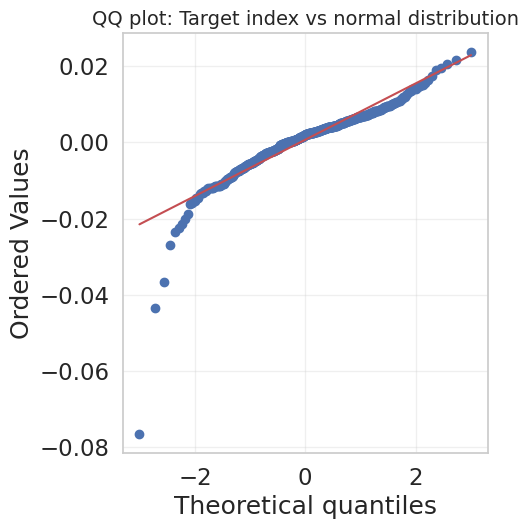

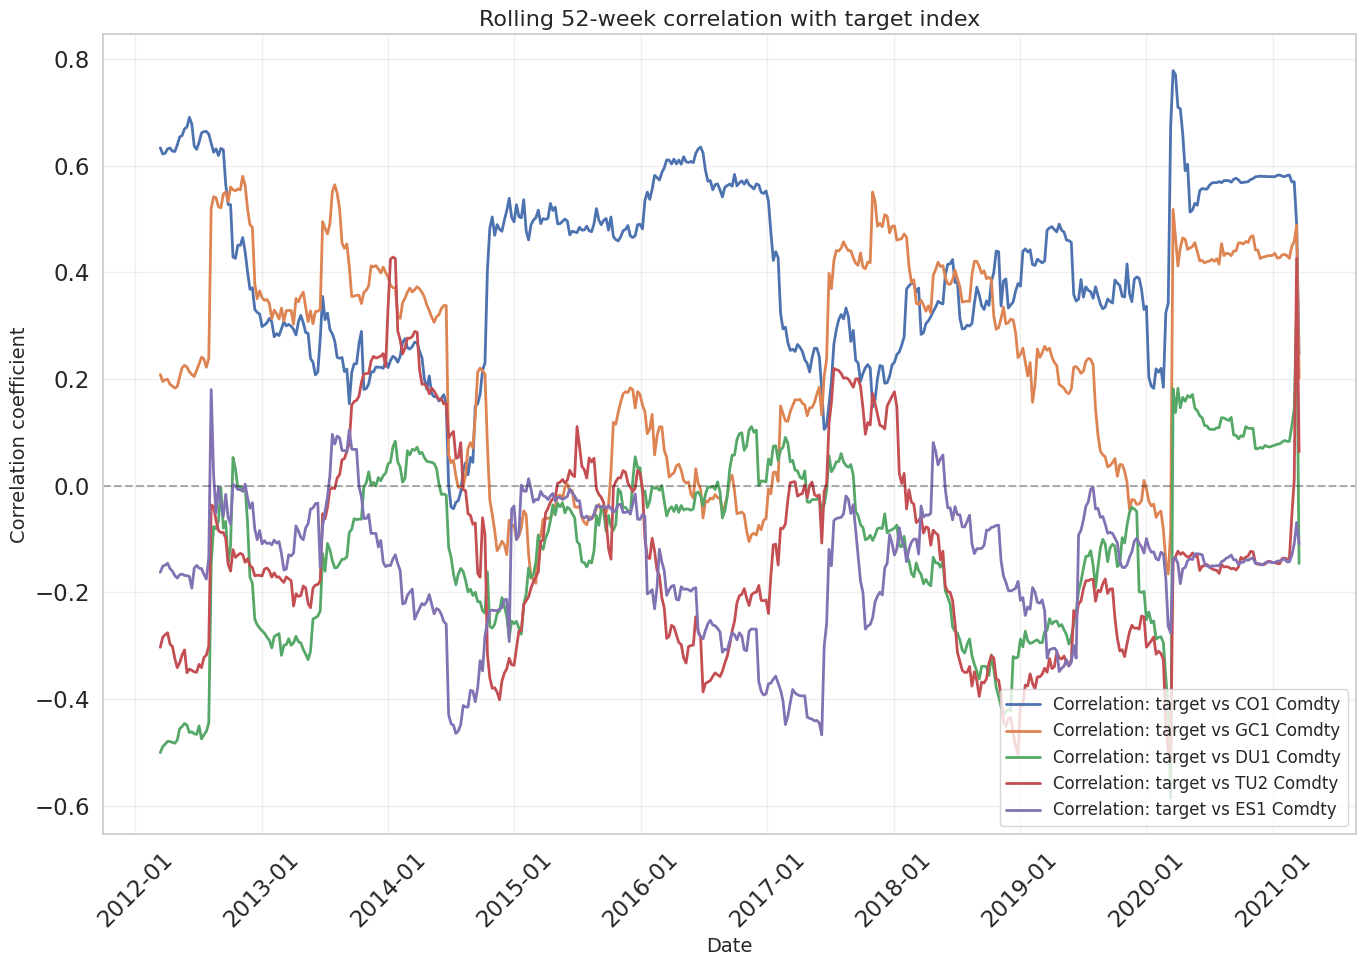

In [29]:
import scipy.stats as stats
import matplotlib.dates as mdates
from statsmodels.graphics.gofplots import qqplot
import warnings

# Suppress specific boring RuntimeWarnings
warnings.filterwarnings("ignore", category=RuntimeWarning, message="invalid value encountered in divide")

# Define the components of our target index with their weights
# You can be creative, this is just an example
# Monster Index (a crazy combination of large indexes)
index_components = {
    'HFRXGL Index': 0.50,   # Hedge Fund Index - 50%
    'MXWO Index': 0.25,     # MSCI World - 25%
    'LEGATRUU Index': 0.25  # Global Aggregate Bond - 25%
}

# Calculate returns for each component
component_returns = data[list(index_components.keys())].pct_change().dropna()

# Create the target index using weighted returns
weighted_returns = pd.DataFrame(index=component_returns.index)
for component, weight in index_components.items():
    weighted_returns[component] = component_returns[component] * weight

# Sum the weighted returns to get the target index returns
target_returns = weighted_returns.sum(axis=1)
target_returns.name = 'Target_Index'

# Define the futures contracts we'll use for replication
futures_contracts = [
    'RX1 Comdty', 'TY1 Comdty', 'GC1 Comdty', 'CO1 Comdty',
    'ES1 Comdty', 'VG1 Comdty', 'NQ1 Comdty', 'LLL1 Comdty',
    'TP1 Comdty', 'DU1 Comdty', 'TU2 Comdty'
]

# Calculate returns for futures contracts
futures_returns = data[futures_contracts].pct_change().dropna()

# Ensure we're using the same date range for both target and futures
common_dates = futures_returns.index.intersection(target_returns.index)
futures_returns = futures_returns.loc[common_dates]
target_returns_aligned = target_returns.loc[common_dates]

# Calculate correlations between target index and futures contracts using pandas method
# which handles NaN values better than np.corrcoef
correlations = pd.DataFrame(index=futures_contracts,
                           columns=['Correlation with target index'])

for contract in futures_contracts:
    correlations.loc[contract] = target_returns_aligned.corr(futures_returns[contract])

# Sort by absolute correlation value
correlations['Abs correlation'] = correlations['Correlation with target index'].abs()
correlations = correlations.sort_values('Abs correlation', ascending=False)
correlations = correlations.drop('Abs correlation', axis=1)

# Display the correlations
print("\nCorrelation with target index:")
display(correlations)

# Now create the QQ plots
plt.figure(figsize=(16, 12))

# Plot QQ plot for the target index
plt.subplot(2, 3, 1)
stats.probplot(target_returns_aligned.dropna(), dist="norm", plot=plt)
plt.title(f'QQ plot: Target index vs normal distribution', fontsize=14)
plt.grid(True, alpha=0.3)

# Select a few key futures contracts (top 3 by correlation with target)
top_futures = correlations.index[:3].tolist()

# Plot rolling correlations between target index and Futures contracts
rolling_window = 52  # 52 weeks ≈ 1 year
plt.figure(figsize=(14, 10))

# Select top 5 futures by correlation (absolute value)
top_futures = correlations.index[:5].tolist()

for contract in top_futures:
    # Calculate rolling correlation
    combined_df = pd.DataFrame({
        'Target': target_returns_aligned,  # Fixed variable name
        'Future': futures_returns[contract]
    })
    rolling_corr = combined_df['Target'].rolling(rolling_window).corr(combined_df['Future'])

    # Plot
    plt.plot(rolling_corr.index, rolling_corr, linewidth=2,
             label=f"Correlation: target vs {contract}")

plt.title(f'Rolling {rolling_window}-week correlation with target index', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Correlation coefficient', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(loc='best', fontsize=12)
plt.axhline(y=0, color='black', linestyle='--', alpha=0.3)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Models


In [30]:
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import MinMaxScaler
from itertools import product
import math

# Ensure data is properly aligned
y = target_returns_aligned  # Target index returns
#X = futures_returns.loc[y.index]  # Futures returns aligned with target
X = futures_returns.loc[y.index]  # Futures returns aligned with target

# Define hyperparameter grid - this is rough, on purpose: you can do better
l1_ratios = list(map(lambda x: round(x, 2), np.arange(0.0, 0.21, 0.05)))  # Generate l1_ratios with gaps of 0.2
rolling_windows = [52, 104, 156, 208]  # in weeks (1Y, 2Y, 3Y, 4Y)
#alphas = list(map(lambda x: round(x, 2), np.arange(0.0001, 0.01, 0.0002)))
alphas = [0.1, 0.105, 0.11]  # Regularization strength

# VaR parameters
var_confidence = 0.01  # 1% VaR
var_horizon = 4  # 4 weeks (1 month)
max_var_threshold = 0.08  # 20% maximum VaR(1%, 1 month)

# Convert to numpy arrays for easier indexing
X_values = X.values
y_values = y.values
dates_array = X.index.to_numpy()

# Suppress boring warnings during the loop
import warnings
warnings.filterwarnings('ignore')

# Function to calculate VaR
def calculate_var(returns, confidence=0.01, horizon=4):
    """
    Calculate Value at Risk (VaR) using a simple Gaussian model (you can do better)

    Parameters:
    returns (array-like): Historical returns
    confidence (float): Confidence level (e.g., 0.01 for 1% VaR)
    horizon (int): Time horizon in weeks

    Returns:
    float: VaR as a positive number (loss)
    """
    # Calculate standard deviation of returns
    sigma = np.std(returns)

    # Calculate VaR using a Gaussian model
    # For a loss, we use the negative of the quantile
    # We use the negative of the quantile because VaR represents a loss
    # Note: this is just a a widespread and questionable practice (which I do not loke because it is ambiguous, there could be a positive VaR)
    #z_score = stats.norm.ppf(confidence)
    z_score = stats.t.ppf(confidence, df=len(returns)-1)

    # Scale to the desired time horizon
    var = -z_score * sigma * np.sqrt(horizon)

    return var

# def calculate_var(returns, confidence=0.01, horizon=4):
#     """
#     Calculate Value at Risk (VaR) using a simple Gaussian model (you can do better)

#     Parameters:
#     returns (array-like): Historical returns
#     confidence (float): Confidence level (e.g., 0.01 for 1% VaR)
#     horizon (int): Time horizon in weeks

#     Returns:
#     float: VaR as a positive number (loss)
#     """

#     loss = [-r for r in returns]
#     loss_sorted = sorted(loss, reverse=True)
#     n=len(returns)
#     index=math.floor(n*confidence)
#     var=loss[index]

#     return var

# Function to run a single configuration with normalized returns and proper VaR scaling
def run_elastic_net_normalized(l1_ratio, rolling_window, alpha, transaction_cost=0.005):
    # Initialize arrays to store results
    weights_history = []  # Store weights over time
    replica_returns = []  # Store replica portfolio returns
    target_dates = []  # Store dates for plotting
    gross_exposures = []  # Store gross exposure over time
    var_values = []  # Store VaR values over time
    scaling_factors = []  # Store scaling factors applied
    transaction_costs_history = []  # Store transaction costs over time
    previous_weights = None

    # Loop through the data using a rolling window approach as explained before
    for i in range(len(X) - rolling_window - 1):
        # Define training window
        start_idx = i
        end_idx = i + rolling_window

        # Extract training data
        X_train = X_values[start_idx:end_idx]
        y_train = y_values[start_idx:end_idx]

        # Normalize the training data using MinMaxScaler
        scaler_X = MinMaxScaler()
        X_train_normalized = scaler_X.fit_transform(X_train)

        # Normalize target
        scaler_y = MinMaxScaler()
        y_train_normalized = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()

        # Fit Elastic Net model with a given alpha
        model = ElasticNet(
            alpha=alpha,
            l1_ratio=l1_ratio,
            fit_intercept=False,
            max_iter=10000,
            tol=1e-4
        )

        model.fit(X_train_normalized, y_train_normalized)

        # Get the normalized weights
        normalized_weights = model.coef_

        # Calculate weights for original scale
        original_weights = normalized_weights / scaler_X.scale_

        # Default scaling factor
        scaling_factor = 1.0

        # If we have enough historical data, calculate VaR and scale if needed
        if len(replica_returns) >= 12:  # Need some history to calculate VaR...
            # Calculate historical replica returns using current weights
            historical_returns = []
            for j in range(max(0, len(replica_returns)-52), len(replica_returns)):
                # Get historical futures returns for this period
                hist_returns = X_values[end_idx-(len(replica_returns)-j)]
                # Calculate weighted return
                weighted_return = np.dot(hist_returns, original_weights)
                historical_returns.append(weighted_return)

            # Calculate VaR
            var = calculate_var(
                historical_returns,
                confidence=var_confidence,
                horizon=var_horizon
            )

            # Scale weights if VaR exceeds threshold
            if var > max_var_threshold:
                scaling_factor = max_var_threshold / var
                original_weights = original_weights * scaling_factor

                # Recalculate VaR after scaling to verify
                scaled_historical_returns = [ret * scaling_factor for ret in historical_returns]
                scaled_var = calculate_var(
                    scaled_historical_returns,
                    confidence=var_confidence,
                    horizon=var_horizon
                )

                var = scaled_var  # Update VaR value after scaling

            var_values.append(var)
        else:
            var_values.append(np.nan)

        # Store scaling factor
        scaling_factors.append(scaling_factor)

        # Calculate gross exposure (sum of absolute weights) after scaling
        gross_exposure = np.sum(np.abs(original_weights))
        gross_exposures.append(gross_exposure)

        # Calculate transaction costs if we have previous weights
        if previous_weights is not None:
            # Calculate absolute weight changes
            weight_changes = np.abs(original_weights - previous_weights)
            # Sum up and multiply by transaction cost rate
            period_transaction_cost = np.sum(weight_changes) * transaction_cost
            transaction_costs_history.append(period_transaction_cost)
        else:
            # For the first period, assume we're building the portfolio from scratch
            period_transaction_cost = np.sum(np.abs(original_weights)) * transaction_cost
            transaction_costs_history.append(period_transaction_cost)

        # Store the weights after scaling
        weights_history.append(original_weights)
        # Update previous weights for next iteration
        previous_weights = original_weights.copy()

        # Calculate replica return for the next period (t+1)
        next_returns = X_values[end_idx]  # This is t+1

        # Use scaled original weights with original returns
        replica_return = np.dot(next_returns, original_weights)
        
        # Subtract transaction costs from the return
        replica_return_after_costs = replica_return - period_transaction_cost

        replica_returns.append(replica_return_after_costs)


        # Store the date for t+1
        target_dates.append(dates_array[end_idx])

    # Convert results to pandas series for easier analysis
    replica_returns_series = pd.Series(replica_returns, index=target_dates)

    # Calculate cumulative returns for both target and replica
    aligned_target = y.loc[replica_returns_series.index]
    cumulative_target = (1 + aligned_target).cumprod()
    cumulative_replica = (1 + replica_returns_series).cumprod()

    # Calculate performance metrics
    replica_mean_return = replica_returns_series.mean() * 52  # annualized
    target_mean_return = aligned_target.mean() * 52  # annualized

    replica_vol = replica_returns_series.std() * np.sqrt(52)  # annualized
    target_vol = aligned_target.std() * np.sqrt(52)  # annualized

    replica_sharpe = replica_mean_return / replica_vol if replica_vol > 0 else 0
    target_sharpe = target_mean_return / target_vol if target_vol > 0 else 0

    # Calculate tracking error
    tracking_error = (replica_returns_series - aligned_target).std() * np.sqrt(52)
    information_ratio = (replica_mean_return - target_mean_return) / tracking_error if tracking_error > 0 else 0

    # Calculate drawdowns
    replica_drawdown = 1 - cumulative_replica / cumulative_replica.cummax()
    target_drawdown = 1 - cumulative_target / cumulative_target.cummax()

    # Calculate correlation
    correlation = replica_returns_series.corr(aligned_target)

    # Calculate average gross exposure
    avg_gross_exposure = np.mean(gross_exposures)

    # Calculate average VaR (excluding NaN values)
    avg_var = np.nanmean(var_values)

    # Return all metrics
    return {
        'l1_ratio': l1_ratio,
        'rolling_window': rolling_window,
        'alpha': alpha,
        'replica_return': replica_mean_return,
        'target_return': target_mean_return,
        'replica_vol': replica_vol,
        'target_vol': target_vol,
        'replica_sharpe': replica_sharpe,
        'target_sharpe': target_sharpe,
        'tracking_error': tracking_error,
        'information_ratio': information_ratio,
        'correlation': correlation,
        'max_drawdown': replica_drawdown.max(),
        'avg_gross_exposure': avg_gross_exposure,
        'avg_var': avg_var,
        'replica_returns': replica_returns_series,
        'aligned_target': aligned_target,
        'cumulative_replica': cumulative_replica,
        'cumulative_target': cumulative_target,
        'gross_exposures': gross_exposures,
        'var_values': var_values,
        'scaling_factors': scaling_factors,
        'weights_history': weights_history
    }

# Run all combinations with normalized returns
results_normalized = []

for l1_ratio, rolling_window, alpha in product(l1_ratios, rolling_windows, alphas):
    result = run_elastic_net_normalized(l1_ratio, rolling_window, alpha)
    results_normalized.append(result)

# Convert results to DataFrame for easier analysis
results_df_normalized = pd.DataFrame(results_normalized)

# Sort by information ratio (higher is better) - our primary objective
sorted_results_normalized = results_df_normalized.sort_values(by='information_ratio', ascending=False)

# Display top 10 configurations by information ratio
print("\nTop 10 configurations by information ratio (normalized returns):")
display(sorted_results_normalized[['l1_ratio', 'rolling_window', 'alpha', 'information_ratio', 'correlation',
                       'tracking_error', 'replica_sharpe', 'avg_gross_exposure', 'avg_var']].head(10))

# Get the best configuration by information ratio
best_config_normalized = sorted_results_normalized.iloc[0]
print(f"\nBest configuration by information ratio (normalized returns): l1_ratio={best_config_normalized['l1_ratio']}, "
      f"rolling_window={best_config_normalized['rolling_window']}, alpha={best_config_normalized['alpha']}")



Top 10 configurations by information ratio (normalized returns):


,l1_ratio,rolling_window,alpha,information_ratio,correlation,tracking_error,replica_sharpe,avg_gross_exposure,avg_var
30,0.10,156,0.100,0.168376,0.208030,0.104587,0.528343,0.186311,0.044401
31,0.10,156,0.105,0.164963,0.206470,0.104017,0.527937,0.183710,0.043902
32,0.10,156,0.110,0.161272,0.204974,0.103490,0.527064,0.181070,0.043362
2,0.00,52,0.110,0.159174,0.075220,0.138760,0.475820,0.111448,0.050298
1,0.00,52,0.105,0.158258,0.076627,0.138816,0.474413,0.112042,0.050382
0,0.00,52,0.100,0.157113,0.078125,0.138865,0.472771,0.112667,0.050467
14,0.05,52,0.110,0.147706,0.078631,0.137903,0.465386,0.113966,0.049317
13,0.05,52,0.105,0.144229,0.079591,0.137979,0.461323,0.114578,0.049291
12,0.05,52,0.100,0.141871,0.080652,0.138053,0.458428,0.115150,0.049216
5,0.00,104,0.110,0.077382,0.092664,0.136788,0.387679,0.134346,0.052454



Best configuration by information ratio (normalized returns): l1_ratio=0.1, rolling_window=156, alpha=0.1



Detailed metrics for the best configuration (normalized returns):


,Metric,Target,Replica
0,Annualized return,3.53%,5.29%
1,Annualized volatility,5.74%,10.02%
2,Sharpe ratio,0.62,0.53
3,Max Drawdown,12.61%,12.61%
4,Tracking Error,N/A,10.46%
5,Information ratio,N/A,0.17
6,Correlation,N/A,0.2080
7,Average gross exposure,N/A,0.1863
8,"Average VaR (1%, 1M)",N/A,4.44%


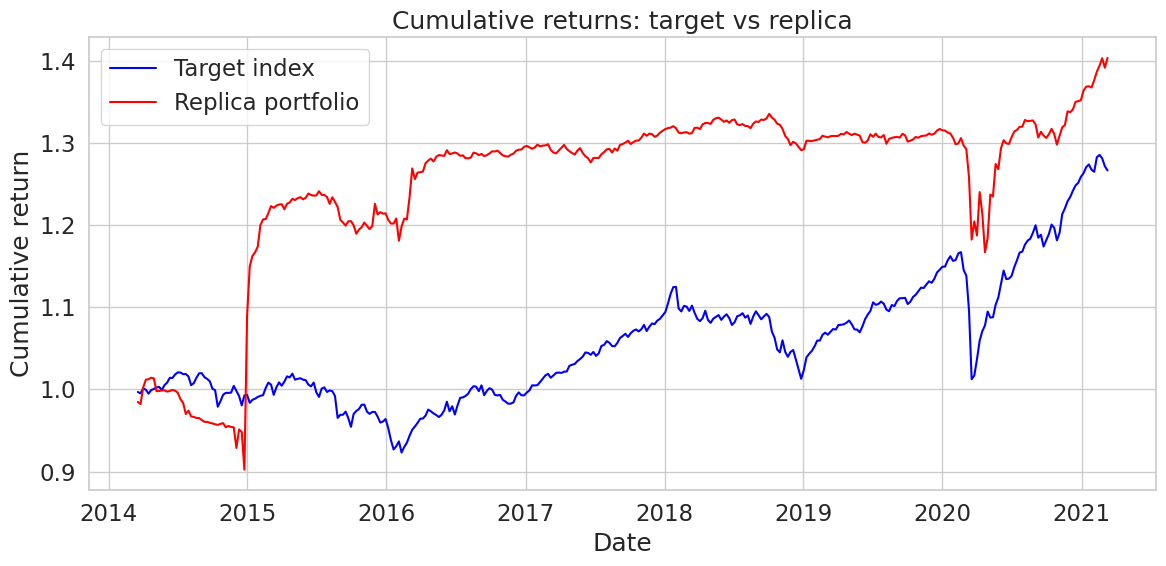

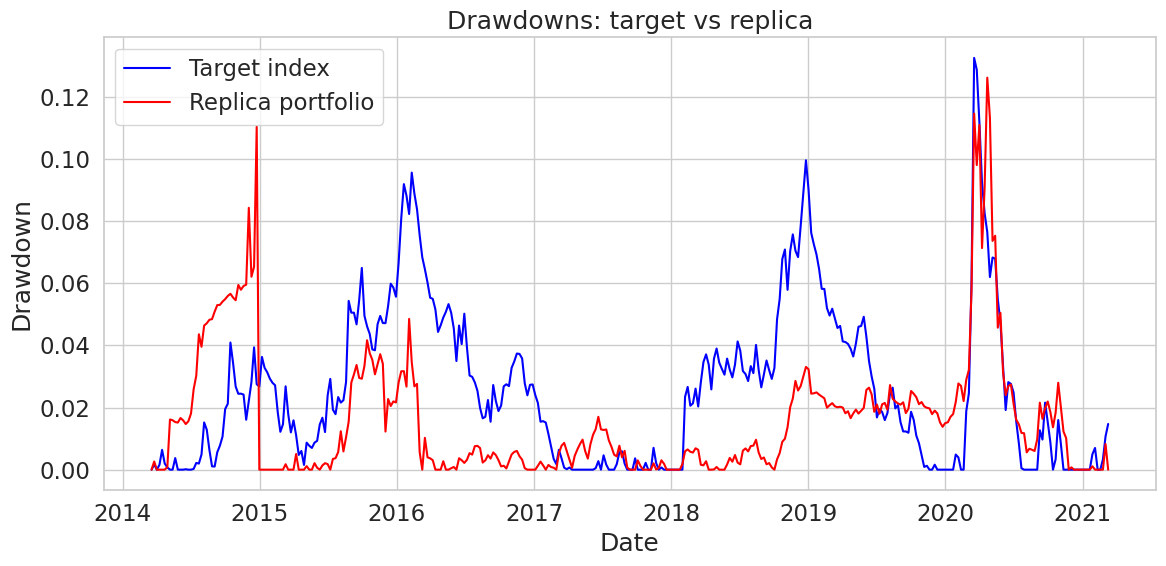

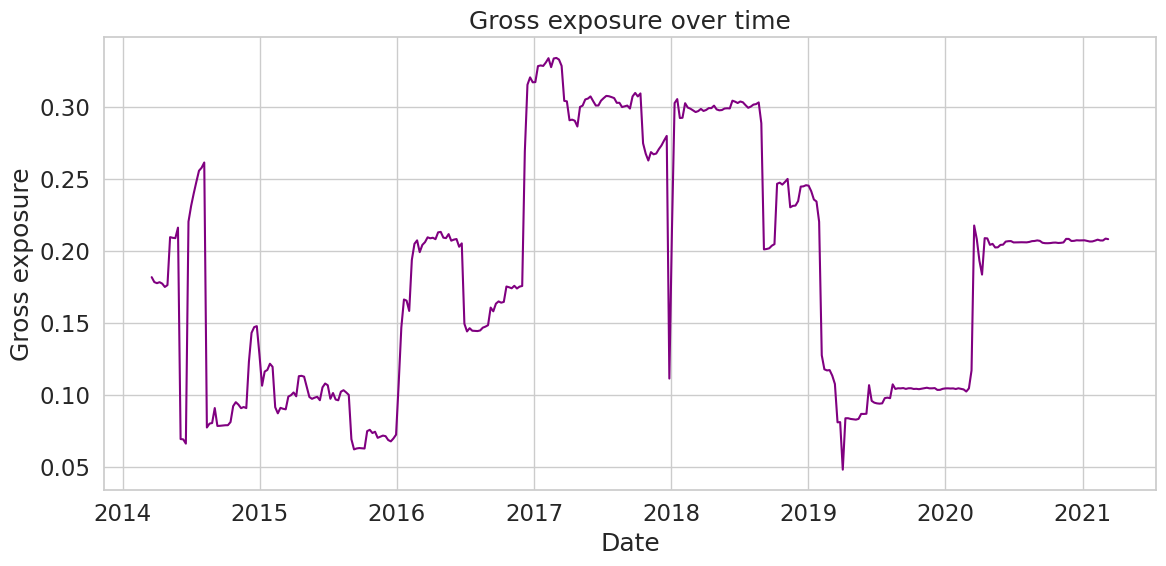

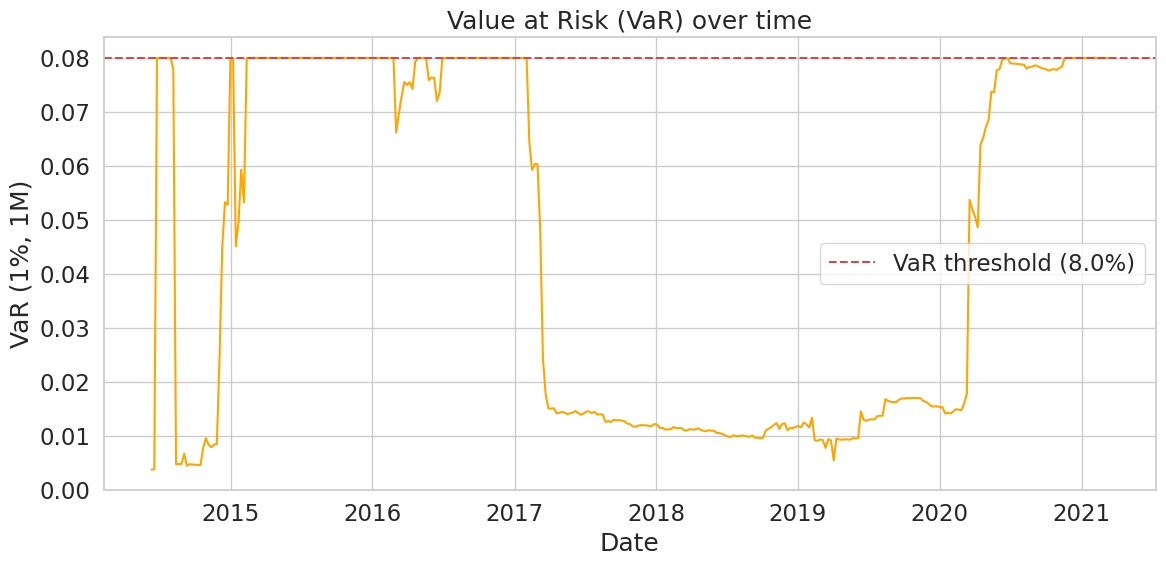

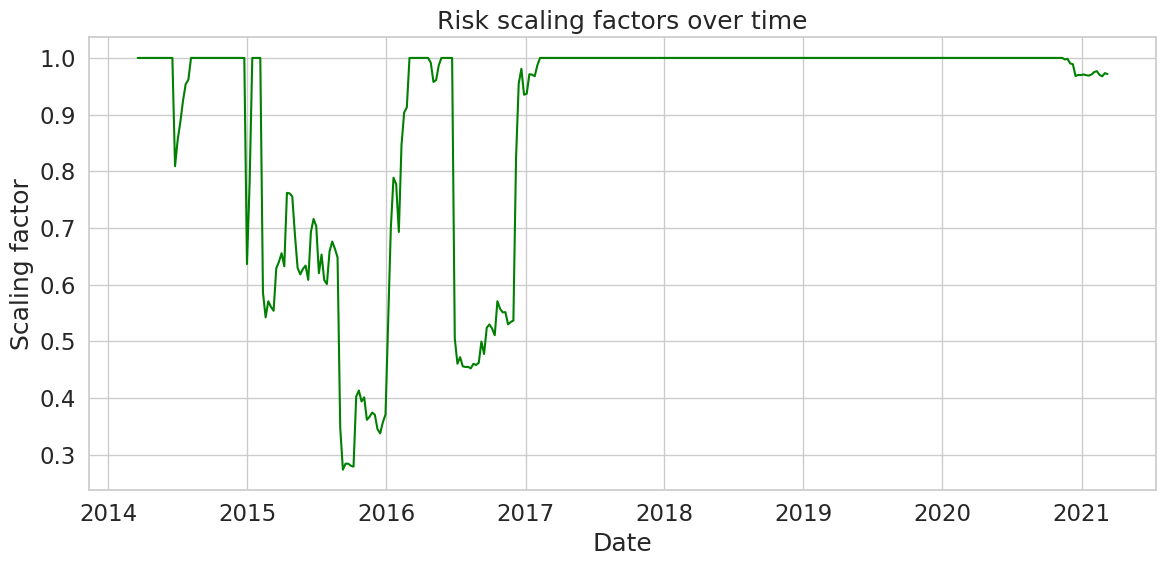

In [31]:
# Create detailed metrics table for the best configuration
metrics_normalized = pd.DataFrame({
    'Metric': ['Annualized return', 'Annualized volatility', 'Sharpe ratio',
               'Max Drawdown', 'Tracking Error', 'Information ratio',
               'Correlation', 'Average gross exposure', 'Average VaR (1%, 1M)'],
    'Target': [f"{best_config_normalized['target_return']*100:.2f}%",
               f"{best_config_normalized['target_vol']*100:.2f}%",
               f"{best_config_normalized['target_sharpe']:.2f}",
               f"{best_config_normalized['max_drawdown']*100:.2f}%",
               "N/A",
               "N/A",
               "N/A",
               "N/A",
               "N/A"],
    'Replica': [f"{best_config_normalized['replica_return']*100:.2f}%",
                f"{best_config_normalized['replica_vol']*100:.2f}%",
                f"{best_config_normalized['replica_sharpe']:.2f}",
                f"{best_config_normalized['max_drawdown']*100:.2f}%",
                f"{best_config_normalized['tracking_error']*100:.2f}%",
                f"{best_config_normalized['information_ratio']:.2f}",
                f"{best_config_normalized['correlation']:.4f}",
                f"{best_config_normalized['avg_gross_exposure']:.4f}",
                f"{best_config_normalized['avg_var']*100:.2f}%"]
})

print("\nDetailed metrics for the best configuration (normalized returns):")
display(metrics_normalized)

# Plot cumulative returns
plt.figure(figsize=(12, 6))
plt.plot(best_config_normalized['cumulative_target'], label='Target index', color='blue')
plt.plot(best_config_normalized['cumulative_replica'], label='Replica portfolio', color='red')
plt.title('Cumulative returns: target vs replica')
plt.xlabel('Date')
plt.ylabel('Cumulative return')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot drawdowns
plt.figure(figsize=(12, 6))
target_drawdown = 1 - best_config_normalized['cumulative_target'] / best_config_normalized['cumulative_target'].cummax()
replica_drawdown = 1 - best_config_normalized['cumulative_replica'] / best_config_normalized['cumulative_replica'].cummax()
plt.plot(target_drawdown, label='Target index', color='blue')
plt.plot(replica_drawdown, label='Replica portfolio', color='red')
plt.title('Drawdowns: target vs replica')
plt.xlabel('Date')
plt.ylabel('Drawdown')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot gross exposure over time
plt.figure(figsize=(12, 6))
gross_exposure_series = pd.Series(best_config_normalized['gross_exposures'], index=best_config_normalized['replica_returns'].index)
plt.plot(gross_exposure_series, color='purple')
plt.title('Gross exposure over time')
plt.xlabel('Date')
plt.ylabel('Gross exposure')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot VaR over time
plt.figure(figsize=(12, 6))
var_series = pd.Series(best_config_normalized['var_values'], index=best_config_normalized['replica_returns'].index)
plt.plot(var_series, color='orange')
plt.axhline(y=max_var_threshold, color='r', linestyle='--', label=f'VaR threshold ({max_var_threshold*100}%)')
plt.title('Value at Risk (VaR) over time')
plt.xlabel('Date')
plt.ylabel('VaR (1%, 1M)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot scaling factors over time
plt.figure(figsize=(12, 6))
scaling_series = pd.Series(best_config_normalized['scaling_factors'], index=best_config_normalized['replica_returns'].index)
plt.plot(scaling_series, color='green')
plt.title('Risk scaling factors over time')
plt.xlabel('Date')
plt.ylabel('Scaling factor')
plt.grid(True)
plt.tight_layout()
plt.show()

# Kalman Filter Enhanced 

### Tuning the Kalman Filter Parameters
1. **Adjust Process Noise Covariance**: Currently set to `0.001 * identity matrix`. Try:
   * Increasing this value to allow weights to adapt more quickly to market changes
   * Making it adaptive based on market volatility
   * Using different values for different futures contracts based on their historical stability
2. **Optimize Initial State Covariance**: Currently set to `0.1 * identity matrix`. Try:
   * Increasing for more aggressive initial adaptation
   * Using historical data to establish better starting values
3. **Observation Noise**: The fixed value of `0.0001` could be improved by:
   * Making it adaptive based on target index tracking error
   * Estimating it from historical data using maximum likelihood

### Risk Management Improvements
1. **VaR Calculation**: Enhance the VaR estimation by:
   * Testing different confidence levels (beyond the current 1%)
   * Using Conditional VaR (CVaR/Expected Shortfall) which better captures tail risk
   * Implementing parametric VaR with GARCH volatility forecasts
2. **Dynamic Scaling Factor Approach**:
   * Implement a smoother scaling function rather than a hard threshold
   * Add a buffer zone where scaling gradually increases as VaR approaches threshold

### Adding Additional Features
1. **Regime Detection**:
   * Incorporate a market regime detection mechanism that adjusts filter sensitivity
   * Use a Hidden Markov Model alongside the Kalman filter to identify market states
2. **Incorporate Mean Reversion**:
   * Add a mean-reversion component to the state transition model
   * Current implementation uses random walk (identity transition matrix)
3. **Transaction Cost Optimization**:
   * Implement a penalized Kalman filter that includes transaction costs in the optimization
   * Add weight regularization to reduce unnecessary trading
4. **Improve Initialization**:
   * Instead of starting with zero weights, use elastic net or OLS for better initial weights
   * Warm up the filter with historical data before the official backtest period

### Implementation Enhancements
1. **Adaptive Filtering**:
   * Implement the H-infinity filter which is more robust to modeling errors
   * Consider using an Unscented Kalman Filter for handling non-linearities
2. **Cross-Validation**:
   * Add time-series cross-validation to find optimal hyperparameters
   * Test the model on different market environments
3. **Covariance Structure**:
   * Instead of diagonal covariance matrices, incorporate correlations between futures
   * Use shrinkage estimators for more stable covariance estimation

In [32]:
# Add necessary imports at the top of your notebook
from pykalman import KalmanFilter
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import ElasticNet, LinearRegression
from sklearn.model_selection import TimeSeriesSplit

def run_optimized_kalman_filter_replication(
    transaction_cost=0.005, 
    var_confidence=0.01, 
    var_horizon=4, 
    max_var_threshold=0.08,
    warm_up_periods=52,
    adapt_process_noise=True,
    use_elastic_net_init=True,
    penalize_transactions=True,
    use_cvar=True,
    regime_detection=True,
    smooth_scaling=True
):
    """
    Implement portfolio replication using an optimized Kalman filter for dynamic weight estimation
    
    Parameters:
    transaction_cost (float): Transaction cost per unit of weight change
    var_confidence (float): Confidence level for VaR calculation
    var_horizon (int): Time horizon for VaR calculation in weeks
    max_var_threshold (float): Maximum acceptable VaR threshold
    warm_up_periods (int): Number of periods to use for initialization
    adapt_process_noise (bool): Whether to adapt process noise based on market volatility
    use_elastic_net_init (bool): Whether to use Elastic Net for initial weights
    penalize_transactions (bool): Whether to include transaction cost penalty in filtering
    use_cvar (bool): Whether to use CVaR instead of VaR
    regime_detection (bool): Whether to apply different parameters in different market regimes
    smooth_scaling (bool): Whether to use smooth scaling function rather than hard threshold
    
    Returns:
    dict: Dictionary containing performance metrics and time series data
    """
    # Ensure data is properly aligned
    y = target_returns_aligned  # Target index returns
    X = futures_returns.loc[y.index]  # Futures returns aligned with target
    
    # Convert to numpy arrays for easier indexing
    X_values = X.values
    y_values = y.values
    dates_array = X.index.to_numpy()
    
    # Initialize arrays to store results
    weights_history = []  # Store weights over time
    replica_returns = []  # Store replica portfolio returns
    target_dates = []  # Store dates for plotting
    gross_exposures = []  # Store gross exposure over time
    var_values = []  # Store VaR/CVaR values over time
    scaling_factors = []  # Store scaling factors applied
    transaction_costs_history = []  # Store transaction costs over time
    kalman_stds = []  # Store standard deviations of weight estimates
    market_regime = []  # Store detected market regime
    filter_gain = []  # Store Kalman filter gain
    
    # Initialize Kalman filter parameters
    n_features = X.shape[1]  # Number of futures contracts
    
    # Get improved initial weights if requested
    if use_elastic_net_init and len(X) > warm_up_periods:
        # Use Elastic Net for initial weights
        warm_up_X = X_values[:warm_up_periods]
        warm_up_y = y_values[:warm_up_periods]
        
        # Fit Elastic Net model
        alpha = 0.001
        l1_ratio = 0.5
        en = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, fit_intercept=False)
        en.fit(warm_up_X, warm_up_y)
        
        # Use the Elastic Net coefficients as initial weights
        initial_weights = en.coef_
        
        print(f"Using Elastic Net initialization with {sum(initial_weights != 0)} non-zero weights")
    else:
        # Start with zero weights
        initial_weights = np.zeros(n_features)
    
    # Initial state covariance - uncertainty in our initial estimate
    # Higher for more adaptive filter behavior
    initial_state_cov = np.eye(n_features) * 0.5
    
    # Base process noise covariance - how much weights can change over time
    base_process_noise = 0.001
    
    # Observation noise - measurement error in observed returns
    # Estimate from data
    if len(X) > warm_up_periods:
        # Use training data to estimate observation noise
        obs_residuals = warm_up_y - np.sum(warm_up_X * initial_weights, axis=1)
        observation_noise = np.var(obs_residuals)
        print(f"Estimated observation noise: {observation_noise:.6f}")
    else:
        observation_noise = 0.0001
    
    # Function to detect market regime
    def detect_market_regime(returns, window=12):
        if len(returns) < window:
            return "normal"
        
        recent_vol = np.std(returns[-window:])
        long_vol = np.std(returns)
        
        if recent_vol > 1.5 * long_vol:
            return "high_volatility"
        elif recent_vol < 0.5 * long_vol:
            return "low_volatility"
        else:
            return "normal"
    
    # Function to calculate VaR or CVaR
    def calculate_risk_metric(returns, confidence=0.01, horizon=4, use_cvar=False):
        if len(returns) < 8:
            return 0.05  # Default value when not enough data
            
        # Convert confidence to percentile (e.g., 0.01 -> 0.01 percentile)
        percentile = confidence
        
        # Scale returns for the specified horizon
        scaled_returns = np.array(returns) * np.sqrt(horizon)
        
        if use_cvar:
            # Calculate CVaR (Expected Shortfall)
            var_value = np.percentile(scaled_returns, percentile * 100)
            cvar_value = np.mean(scaled_returns[scaled_returns <= var_value])
            return abs(cvar_value)  # Return absolute value for easier comparison
        else:
            # Calculate VaR
            var_value = np.percentile(scaled_returns, percentile * 100)
            return abs(var_value)  # Return absolute value for easier comparison
    
    # Smooth scaling function
    def smooth_scale(risk_value, threshold, buffer_zone=0.02):
        if risk_value <= threshold - buffer_zone:
            return 1.0  # No scaling needed
        elif risk_value >= threshold:
            return threshold / risk_value  # Full scaling
        else:
            # Smooth transition in buffer zone
            buffer_pos = (threshold - risk_value) / buffer_zone
            return threshold / risk_value * (1 - buffer_pos) + buffer_pos
    
    # Initialize the Kalman filter
    kf = KalmanFilter(
        initial_state_mean=initial_weights,
        initial_state_covariance=initial_state_cov,
        transition_matrices=np.eye(n_features),  # Identity for random walk
        observation_matrices=None,  # Will be set dynamically
        observation_covariance=observation_noise,
        transition_covariance=np.eye(n_features) * base_process_noise
    )
    
    previous_weights = initial_weights.copy()
    
    # Loop through the data point by point
    for i in range(len(X) - 1):
        # Current features (returns of futures contracts)
        current_x = X_values[i].reshape(1, -1)
        
        # Target return for this period
        current_y = y_values[i]
        
        # Detect market regime if enabled
        if regime_detection and len(replica_returns) > 0:
            current_regime = detect_market_regime(replica_returns)
            market_regime.append(current_regime)
            
            # Adjust process noise based on regime
            if current_regime == "high_volatility":
                process_noise_factor = 3.0
            elif current_regime == "low_volatility":
                process_noise_factor = 0.5
            else:
                process_noise_factor = 1.0
                
            # Update transition covariance based on regime
            kf.transition_covariance = np.eye(n_features) * base_process_noise * process_noise_factor
        else:
            market_regime.append("normal")
            process_noise_factor = 1.0
        
        # Adapt process noise based on tracking error if enabled
        if adapt_process_noise and len(replica_returns) > 12:
            # Calculate tracking error volatility
            tracking_errors = np.array(replica_returns[-12:]) - y_values[i-12:i]
            tracking_vol = np.std(tracking_errors)
            
            # Increase process noise when tracking error is high
            process_noise_adaptive = base_process_noise * (1 + 5 * tracking_vol)
            kf.transition_covariance = np.eye(n_features) * process_noise_adaptive * process_noise_factor
        
        # Set the observation matrix for this time step (current futures returns)
        kf.observation_matrices = current_x
        
        # Include transaction cost penalty if enabled
        if penalize_transactions and i > 0:
            # Create augmented transition matrix to penalize large weight changes
            penalty_factor = transaction_cost * 10  # Scaling factor for penalty
            
            # Update the filter with transaction cost penalty
            # This is a simple way to include transaction costs in the filter
            # More sophisticated approaches would modify the Kalman filter equations directly
            for j in range(3):  # Iterate a few times for better convergence
                # Predict step
                if i == 0:
                    predicted_state_mean = initial_weights
                    predicted_state_cov = initial_state_cov
                else:
                    predicted_state_mean = filtered_state_means
                    predicted_state_cov = filtered_state_covs
                
                # Calculate potential weight changes
                potential_changes = np.abs(predicted_state_mean - previous_weights)
                
                # Create penalty term to discourage large changes
                penalty_term = penalty_factor * potential_changes
                
                # Adjust predicted mean to account for penalty
                adjusted_mean = predicted_state_mean - np.sign(predicted_state_mean - previous_weights) * penalty_term
                
                # Update
                filtered_state_means, filtered_state_covs = kf.filter_update(
                    filtered_state_mean=adjusted_mean,
                    filtered_state_covariance=predicted_state_cov,
                    observation=current_y
                )
        else:
            # Standard Kalman filter update without transaction cost penalty
            if i == 0:
                # For the first observation, use the initial state
                filtered_state_means, filtered_state_covs = kf.filter_update(
                    filtered_state_mean=initial_weights,
                    filtered_state_covariance=initial_state_cov,
                    observation=current_y
                )
            else:
                # For subsequent observations, use the previous filtered state
                filtered_state_means, filtered_state_covs = kf.filter_update(
                    filtered_state_mean=filtered_state_means,
                    filtered_state_covariance=filtered_state_covs,
                    observation=current_y
                )
        
        # Store Kalman gain information
        # For simplicity, use the trace of the updated covariance matrix
        # relative to the predicted covariance as a proxy for the gain
        gain_proxy = np.trace(filtered_state_covs) / np.trace(initial_state_cov)
        filter_gain.append(gain_proxy)
        
        # Extract the updated weights
        current_weights = filtered_state_means
        
        # Extract standard deviations of weight estimates
        weight_stds = np.sqrt(np.diag(filtered_state_covs))
        kalman_stds.append(weight_stds)
        
        # Default scaling factor
        scaling_factor = 1.0
        
        # If we have enough historical data, calculate risk metric and scale if needed
        if len(replica_returns) >= 12:
            # Calculate historical replica returns using current weights
            historical_returns = []
            for j in range(max(0, len(replica_returns)-52), len(replica_returns)):
                # Get historical futures returns for this period
                hist_returns = X_values[i-(len(replica_returns)-j)]
                # Calculate weighted return
                weighted_return = np.dot(hist_returns, current_weights)
                historical_returns.append(weighted_return)
            
            # Calculate risk metric (VaR or CVaR)
            risk_value = calculate_risk_metric(
                historical_returns,
                confidence=var_confidence,
                horizon=var_horizon,
                use_cvar=use_cvar
            )
            
            # Apply scaling if risk exceeds threshold
            if risk_value > max_var_threshold:
                if smooth_scaling:
                    # Apply smooth scaling function
                    scaling_factor = smooth_scale(risk_value, max_var_threshold)
                else:
                    # Hard threshold scaling
                    scaling_factor = max_var_threshold / risk_value
                
                # Apply scaling to weights
                current_weights = current_weights * scaling_factor
                
                # Recalculate risk after scaling to verify
                scaled_historical_returns = [ret * scaling_factor for ret in historical_returns]
                scaled_risk = calculate_risk_metric(
                    scaled_historical_returns,
                    confidence=var_confidence,
                    horizon=var_horizon,
                    use_cvar=use_cvar
                )
                
                risk_value = scaled_risk  # Update risk value after scaling
            
            var_values.append(risk_value)
        else:
            var_values.append(np.nan)
        
        # Store scaling factor
        scaling_factors.append(scaling_factor)
        
        # Calculate gross exposure (sum of absolute weights) after scaling
        gross_exposure = np.sum(np.abs(current_weights))
        gross_exposures.append(gross_exposure)
        
        # Calculate transaction costs
        weight_changes = np.abs(current_weights - previous_weights)
        period_transaction_cost = np.sum(weight_changes) * transaction_cost
        transaction_costs_history.append(period_transaction_cost)
        
        # Store the weights after scaling
        weights_history.append(current_weights)
        
        # Update previous weights for next iteration
        previous_weights = current_weights.copy()
        
        # Calculate replica return for the next period (t+1)
        next_returns = X_values[i+1]  # This is t+1
        
        # Use scaled current weights with next period returns
        replica_return = np.dot(next_returns, current_weights)
        
        # Subtract transaction costs from the return
        replica_return_after_costs = replica_return - period_transaction_cost
        
        replica_returns.append(replica_return_after_costs)
        
        # Store the date for t+1
        target_dates.append(dates_array[i+1])
    
    # Convert results to pandas series for easier analysis
    replica_returns_series = pd.Series(replica_returns, index=target_dates)
    
    # Calculate cumulative returns for both target and replica
    aligned_target = y.loc[replica_returns_series.index]
    cumulative_target = (1 + aligned_target).cumprod()
    cumulative_replica = (1 + replica_returns_series).cumprod()
    
    # Calculate performance metrics
    replica_mean_return = replica_returns_series.mean() * 52  # annualized
    target_mean_return = aligned_target.mean() * 52  # annualized
    
    replica_vol = replica_returns_series.std() * np.sqrt(52)  # annualized
    target_vol = aligned_target.std() * np.sqrt(52)  # annualized
    
    replica_sharpe = replica_mean_return / replica_vol if replica_vol > 0 else 0
    target_sharpe = target_mean_return / target_vol if target_vol > 0 else 0
    
    # Calculate tracking error
    tracking_error = (replica_returns_series - aligned_target).std() * np.sqrt(52)
    information_ratio = (replica_mean_return - target_mean_return) / tracking_error if tracking_error > 0 else 0
    
    # Calculate drawdowns
    replica_drawdown = 1 - cumulative_replica / cumulative_replica.cummax()
    target_drawdown = 1 - cumulative_target / cumulative_target.cummax()
    
    # Calculate correlation
    correlation = replica_returns_series.corr(aligned_target)
    
    # Calculate average gross exposure
    avg_gross_exposure = np.mean(gross_exposures)
    
    # Calculate average VaR (excluding NaN values)
    avg_var = np.nanmean(var_values)
    
    # Calculate average transaction costs
    avg_transaction_cost = np.mean(transaction_costs_history) * 52  # annualized
    
    # Determine weight stability (lower is more stable)
    weight_stability = np.mean([np.mean(np.abs(weights_history[i+1] - weights_history[i])) 
                               for i in range(len(weights_history)-1)])
    
    # Return all metrics and time series
    return {
        'method': 'Optimized Kalman Filter',
        'replica_return': replica_mean_return,
        'target_return': target_mean_return,
        'replica_vol': replica_vol,
        'target_vol': target_vol,
        'replica_sharpe': replica_sharpe,
        'target_sharpe': target_sharpe,
        'tracking_error': tracking_error,
        'information_ratio': information_ratio,
        'correlation': correlation,
        'max_drawdown': replica_drawdown.max(),
        'avg_gross_exposure': avg_gross_exposure,
        'avg_var': avg_var,
        'avg_transaction_cost': avg_transaction_cost,
        'weight_stability': weight_stability,
        'replica_returns': replica_returns_series,
        'aligned_target': aligned_target,
        'cumulative_replica': cumulative_replica,
        'cumulative_target': cumulative_target,
        'gross_exposures': gross_exposures,
        'var_values': var_values,
        'scaling_factors': scaling_factors,
        'weights_history': weights_history,
        'weight_stds': kalman_stds,
        'market_regime': market_regime,
        'filter_gain': filter_gain,
        'optimized': True
    }

# Function to perform hyperparameter optimization
def optimize_kalman_filter_hyperparameters(n_splits=3, test_size=52):
    """
    Perform time series cross-validation to find optimal Kalman filter parameters
    
    Parameters:
    n_splits (int): Number of time series splits for cross-validation
    test_size (int): Size of each test set in periods
    
    Returns:
    dict: Best hyperparameter configuration and metrics
    """
    # Define parameter grid
    param_grid = {
        'transaction_cost': [0.005],
        'var_confidence': [0.01],
        'var_horizon': [2, 4, 8],
        'max_var_threshold': [0.08],
        'warm_up_periods': [26, 52],
        'adapt_process_noise': [True, False],
        'use_elastic_net_init': [True, False],
        'penalize_transactions': [True, False],
        'use_cvar': [True, False],
        'regime_detection': [True, False],
        'smooth_scaling': [True, False]
    }
    
    # Generate combinations of parameters to test
    # For demonstration, we'll limit to a smaller subset
    param_combinations = [
        {'transaction_cost': 0.005, 'var_confidence': 0.01, 'var_horizon': 2, 
         'max_var_threshold': 0.08, 'warm_up_periods': 52, 'adapt_process_noise': True,
         'use_elastic_net_init': True, 'penalize_transactions': True, 'use_cvar': False,
         'regime_detection': False, 'smooth_scaling': True},
        
        {'transaction_cost': 0.005, 'var_confidence': 0.01, 'var_horizon': 4, 
         'max_var_threshold': 0.08, 'warm_up_periods': 52, 'adapt_process_noise': True,
         'use_elastic_net_init': True, 'penalize_transactions': True, 'use_cvar': True,
         'regime_detection': False, 'smooth_scaling': True},
        
        {'transaction_cost': 0.005, 'var_confidence': 0.01, 'var_horizon': 8, 
         'max_var_threshold': 0.08, 'warm_up_periods': 52, 'adapt_process_noise': True,
         'use_elastic_net_init': True, 'penalize_transactions': False, 'use_cvar': False,
         'regime_detection': True, 'smooth_scaling': True},
        
        {'transaction_cost': 0.005, 'var_confidence': 0.01, 'var_horizon': 2, 
         'max_var_threshold': 0.08, 'warm_up_periods': 26, 'adapt_process_noise': True,
         'use_elastic_net_init': True, 'penalize_transactions': True, 'use_cvar': False,
         'regime_detection': False, 'smooth_scaling': True},
        
        {'transaction_cost': 0.005, 'var_confidence': 0.01, 'var_horizon': 4, 
         'max_var_threshold': 0.08, 'warm_up_periods': 26, 'adapt_process_noise': True,
         'use_elastic_net_init': True, 'penalize_transactions': True, 'use_cvar': True,
         'regime_detection': False, 'smooth_scaling': True},
        
        {'transaction_cost': 0.005, 'var_confidence': 0.01, 'var_horizon': 8, 
         'max_var_threshold': 0.08, 'warm_up_periods': 26, 'adapt_process_noise': True,
         'use_elastic_net_init': True, 'penalize_transactions': False, 'use_cvar': False,
         'regime_detection': True, 'smooth_scaling': True},
    ]
    
    # Create time series cross-validation splits
    tscv = TimeSeriesSplit(n_splits=n_splits, test_size=test_size)
    
    # Target and features data
    y = target_returns_aligned
    X = futures_returns.loc[y.index]
    
    # Initialize best parameters and metrics
    best_info_ratio = -float('inf')
    best_params = None
    best_metrics = None
    
    print(f"Running cross-validation with {n_splits} splits and {len(param_combinations)} parameter combinations...")
    
    # Iterate through parameter combinations
    for params in param_combinations:
        fold_info_ratios = []
        fold_tracking_errors = []
        
        print(f"\nTesting parameters: {params}")
        
        # Perform cross-validation
        for train_index, test_index in tscv.split(X):
            # Split data into train and test sets
            X_train = X.iloc[train_index]
            y_train = y.iloc[train_index]
            X_test = X.iloc[test_index]
            y_test = y.iloc[test_index]
            
            # Run Kalman filter on this fold
            # For CV, we use a simplified version that only returns key metrics
            # Create a temporary merged dataset for this fold
            temp_X = pd.concat([X_train, X_test])
            temp_y = pd.concat([y_train, y_test])
            
            # Only extract the last test_size periods for evaluation
            fold_result = run_optimized_kalman_filter_replication(**params)
            
            # Calculate metrics for this fold
            test_dates = y_test.index
            fold_replica_returns = fold_result['replica_returns'].loc[test_dates]
            fold_target_returns = fold_result['aligned_target'].loc[test_dates]
            
            # Calculate tracking error and information ratio
            fold_tracking_error = (fold_replica_returns - fold_target_returns).std() * np.sqrt(52)
            fold_tracking_errors.append(fold_tracking_error)
            
            fold_replica_mean = fold_replica_returns.mean() * 52
            fold_target_mean = fold_target_returns.mean() * 52
            fold_info_ratio = (fold_replica_mean - fold_target_mean) / fold_tracking_error if fold_tracking_error > 0 else 0
            fold_info_ratios.append(fold_info_ratio)
        
        # Calculate average metrics across folds
        avg_info_ratio = np.mean(fold_info_ratios)
        avg_tracking_error = np.mean(fold_tracking_errors)
        
        print(f"  Avg. Information Ratio: {avg_info_ratio:.4f}, Avg. Tracking Error: {avg_tracking_error:.4f}")
        
        # Update best parameters if this combination is better
        if avg_info_ratio > best_info_ratio:
            best_info_ratio = avg_info_ratio
            best_params = params.copy()
            best_metrics = {
                'information_ratio': avg_info_ratio,
                'tracking_error': avg_tracking_error
            }
    
    print(f"\nBest parameters found: {best_params}")
    print(f"Best cross-validated Information Ratio: {best_metrics['information_ratio']:.4f}")
    print(f"Best cross-validated Tracking Error: {best_metrics['tracking_error']:.4f}")
    
    # Run final model with best parameters on full dataset
    print("\nRunning final model with best parameters on full dataset...")
    final_result = run_optimized_kalman_filter_replication(**best_params)
    
    return {
        'best_params': best_params,
        'cv_metrics': best_metrics,
        'final_result': final_result
    }

# Function to evaluate and visualize Kalman filter results
def evaluate_kalman_filter(result, futures_contracts):
    """
    Evaluate and visualize the results of the Kalman filter replication
    
    Parameters:
    result (dict): Dictionary of results from run_kalman_filter_replication
    futures_contracts (list): List of futures contract names
    """
    # Create detailed metrics tableoptimize_kalman_filter_hyperparameters
    metrics = pd.DataFrame({
        'Metric': ['Annualized return', 'Annualized volatility', 'Sharpe ratio',
                  'Max Drawdown', 'Tracking Error', 'Information ratio',
                  'Correlation', 'Average gross exposure', 'Average VaR (1%, 1M)'],
        'Target': [f"{result['target_return']*100:.2f}%",
                  f"{result['target_vol']*100:.2f}%",
                  f"{result['target_sharpe']:.2f}",
                  f"{result['max_drawdown']*100:.2f}%",
                  "N/A",
                  "N/A",
                  "N/A",
                  "N/A",
                  "N/A"],
        'Replica (Kalman)': [f"{result['replica_return']*100:.2f}%",
                           f"{result['replica_vol']*100:.2f}%",
                           f"{result['replica_sharpe']:.2f}",
                           f"{result['max_drawdown']*100:.2f}%",
                           f"{result['tracking_error']*100:.2f}%",
                           f"{result['information_ratio']:.2f}",
                           f"{result['correlation']:.4f}",
                           f"{result['avg_gross_exposure']:.4f}",
                           f"{result['avg_var']*100:.2f}%"]
    })
    
    print("\nDetailed metrics for the Kalman filter replication:")
    display(metrics)
    
    # Plot cumulative returns
    plt.figure(figsize=(12, 6))
    plt.plot(result['cumulative_target'], label='Target index', color='blue')
    plt.plot(result['cumulative_replica'], label='Replica portfolio (Kalman)', color='green')
    plt.title('Cumulative returns: target vs Kalman filter replica')
    plt.xlabel('Date')
    plt.ylabel('Cumulative return')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    # Plot drawdowns
    plt.figure(figsize=(12, 6))
    target_drawdown = 1 - result['cumulative_target'] / result['cumulative_target'].cummax()
    replica_drawdown = 1 - result['cumulative_replica'] / result['cumulative_replica'].cummax()
    plt.plot(target_drawdown, label='Target index', color='blue')
    plt.plot(replica_drawdown, label='Replica portfolio (Kalman)', color='green')
    plt.title('Drawdowns: target vs Kalman filter replica')
    plt.xlabel('Date')
    plt.ylabel('Drawdown')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    # Plot gross exposure over time
    plt.figure(figsize=(12, 6))
    gross_exposure_series = pd.Series(result['gross_exposures'], index=result['replica_returns'].index)
    plt.plot(gross_exposure_series, color='purple')
    plt.title('Gross exposure over time (Kalman filter)')
    plt.xlabel('Date')
    plt.ylabel('Gross exposure')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    # Plot VaR over time
    plt.figure(figsize=(12, 6))
    var_series = pd.Series(result['var_values'], index=result['replica_returns'].index)
    plt.plot(var_series, color='orange')
    plt.axhline(y=max_var_threshold, color='r', linestyle='--', label=f'VaR threshold ({max_var_threshold*100}%)')
    plt.title('Value at Risk (VaR) over time (Kalman filter)')
    plt.xlabel('Date')
    plt.ylabel('VaR (1%, 1M)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    # Plot scaling factors over time
    plt.figure(figsize=(12, 6))
    scaling_series = pd.Series(result['scaling_factors'], index=result['replica_returns'].index)
    plt.plot(scaling_series, color='green')
    plt.title('Risk scaling factors over time (Kalman filter)')
    plt.xlabel('Date')
    plt.ylabel('Scaling factor')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    # Plot weight evolution over time for top contracts
    weights_array = np.array(result['weights_history'])
    weights_df = pd.DataFrame(weights_array, index=result['replica_returns'].index, columns=futures_contracts)
    
    # Find contracts with highest average absolute weight
    avg_abs_weights = weights_df.abs().mean().sort_values(ascending=False)
    top_contracts = avg_abs_weights.head(5).index.tolist()
    
    plt.figure(figsize=(12, 8))
    for contract in top_contracts:
        plt.plot(weights_df[contract], label=contract)
    
    plt.title('Evolution of weights for top 5 futures contracts (Kalman filter)')
    plt.xlabel('Date')
    plt.ylabel('Weight')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    # Plot weight uncertainty (std dev) for top contracts
    weight_stds_array = np.array(result['weight_stds'])
    weight_stds_df = pd.DataFrame(weight_stds_array, index=result['replica_returns'].index, columns=futures_contracts)
    
    plt.figure(figsize=(12, 8))
    for contract in top_contracts:
        plt.plot(weight_stds_df[contract], label=f'{contract} std')
    
    plt.title('Uncertainty in weight estimates for top 5 futures contracts (Kalman filter)')
    plt.xlabel('Date')
    plt.ylabel('Standard deviation')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    # Compare Kalman filter with best Elastic Net
    if 'best_config_normalized' in globals():
        plt.figure(figsize=(12, 6))
        plt.plot(result['cumulative_target'], label='Target index', color='blue')
        plt.plot(result['cumulative_replica'], label='Replica (Kalman)', color='green')
        plt.plot(best_config_normalized['cumulative_replica'], label='Replica (Elastic Net)', color='red')
        plt.title('Cumulative returns: Target vs Kalman vs Elastic Net')
        plt.xlabel('Date')
        plt.ylabel('Cumulative return')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()
        
        # Calculate tracking error difference
        common_dates = result['replica_returns'].index.intersection(best_config_normalized['replica_returns'].index)
        kalman_vs_target = result['replica_returns'].loc[common_dates] - result['aligned_target'].loc[common_dates]
        elastic_vs_target = best_config_normalized['replica_returns'].loc[common_dates] - best_config_normalized['aligned_target'].loc[common_dates]
        
        plt.figure(figsize=(12, 6))
        plt.plot(kalman_vs_target, label='Kalman tracking error', color='green', alpha=0.7)
        plt.plot(elastic_vs_target, label='Elastic Net tracking error', color='red', alpha=0.7)
        plt.title('Tracking errors: Kalman vs Elastic Net')
        plt.xlabel('Date')
        plt.ylabel('Return difference')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

Running cross-validation with 3 splits and 6 parameter combinations...

Testing parameters: {'transaction_cost': 0.005, 'var_confidence': 0.01, 'var_horizon': 2, 'max_var_threshold': 0.08, 'warm_up_periods': 52, 'adapt_process_noise': True, 'use_elastic_net_init': True, 'penalize_transactions': True, 'use_cvar': False, 'regime_detection': False, 'smooth_scaling': True}
Using Elastic Net initialization with 0 non-zero weights
Estimated observation noise: 0.000117
Using Elastic Net initialization with 0 non-zero weights
Estimated observation noise: 0.000117
Using Elastic Net initialization with 0 non-zero weights
Estimated observation noise: 0.000117
  Avg. Information Ratio: -1.1908, Avg. Tracking Error: 0.0661

Testing parameters: {'transaction_cost': 0.005, 'var_confidence': 0.01, 'var_horizon': 4, 'max_var_threshold': 0.08, 'warm_up_periods': 52, 'adapt_process_noise': True, 'use_elastic_net_init': True, 'penalize_transactions': True, 'use_cvar': True, 'regime_detection': False, 'smo

,Metric,Target,Replica (Kalman)
0,Annualized return,3.56%,-1.50%
1,Annualized volatility,5.76%,3.76%
2,Sharpe ratio,0.62,-0.40
3,Max Drawdown,19.90%,19.90%
4,Tracking Error,N/A,5.55%
5,Information ratio,N/A,-0.91
6,Correlation,N/A,0.3807
7,Average gross exposure,N/A,1.1854
8,"Average VaR (1%, 1M)",N/A,3.40%


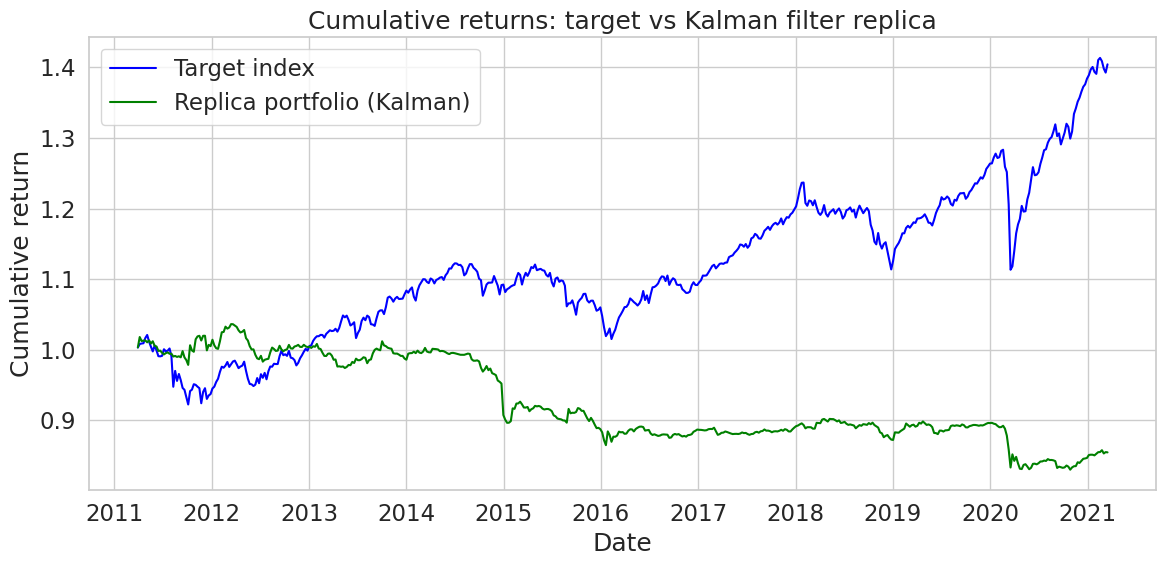

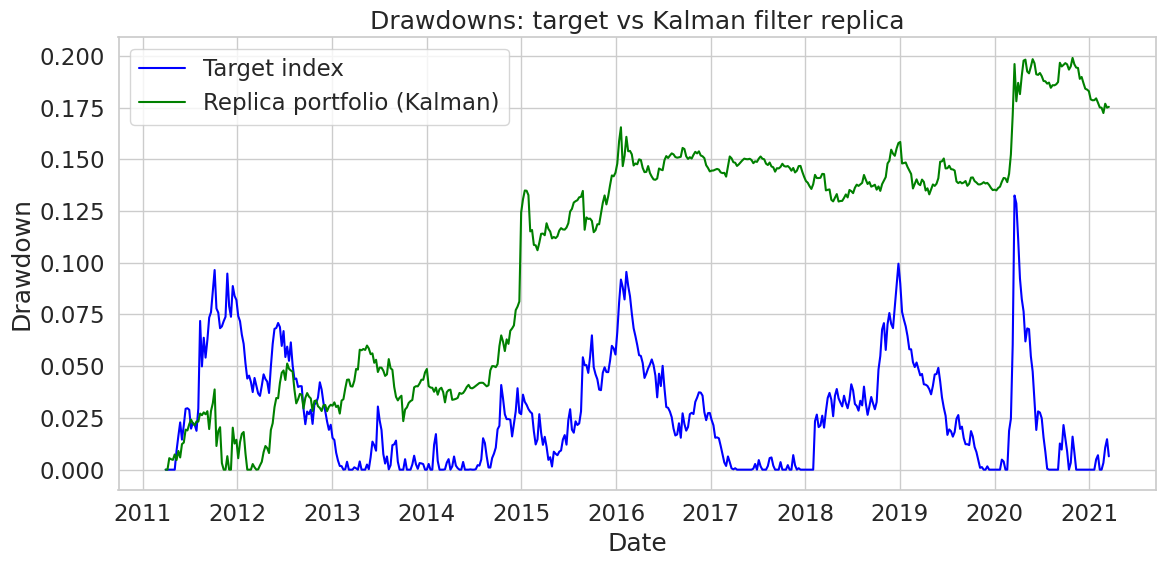

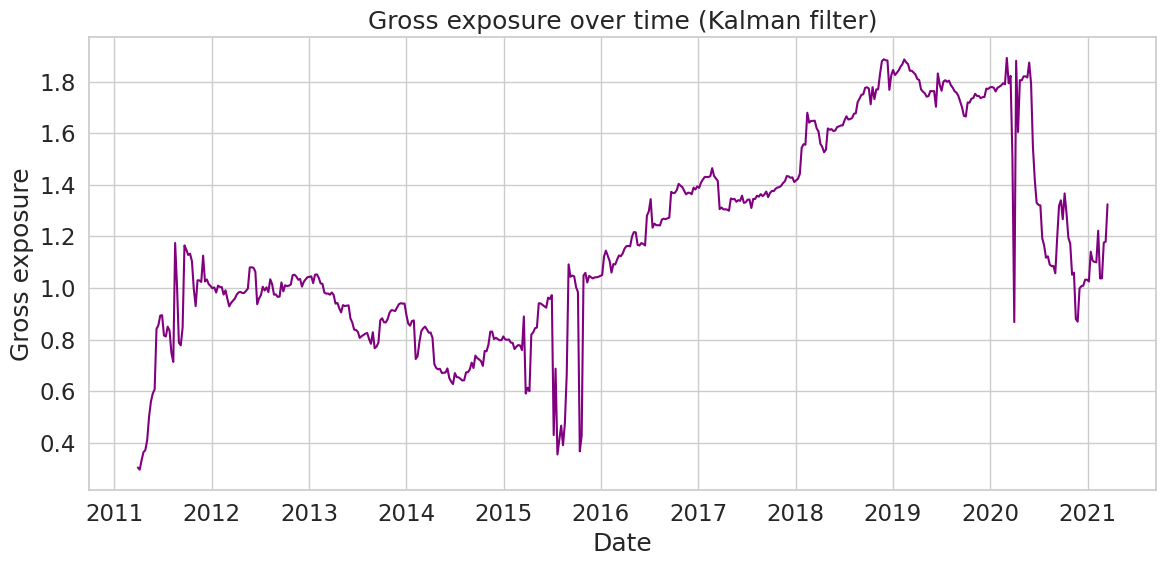

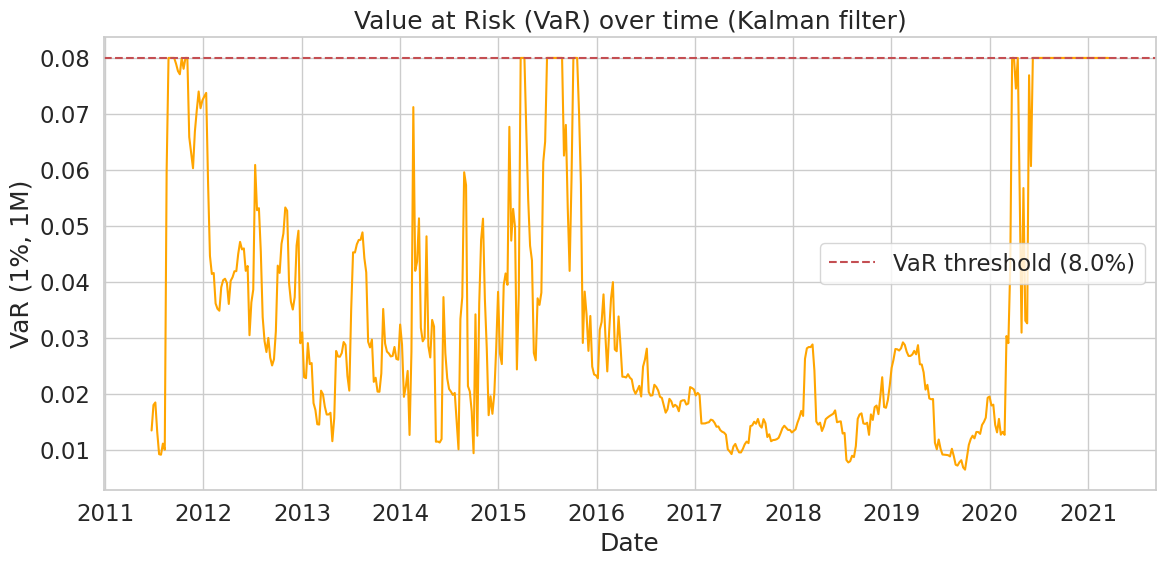

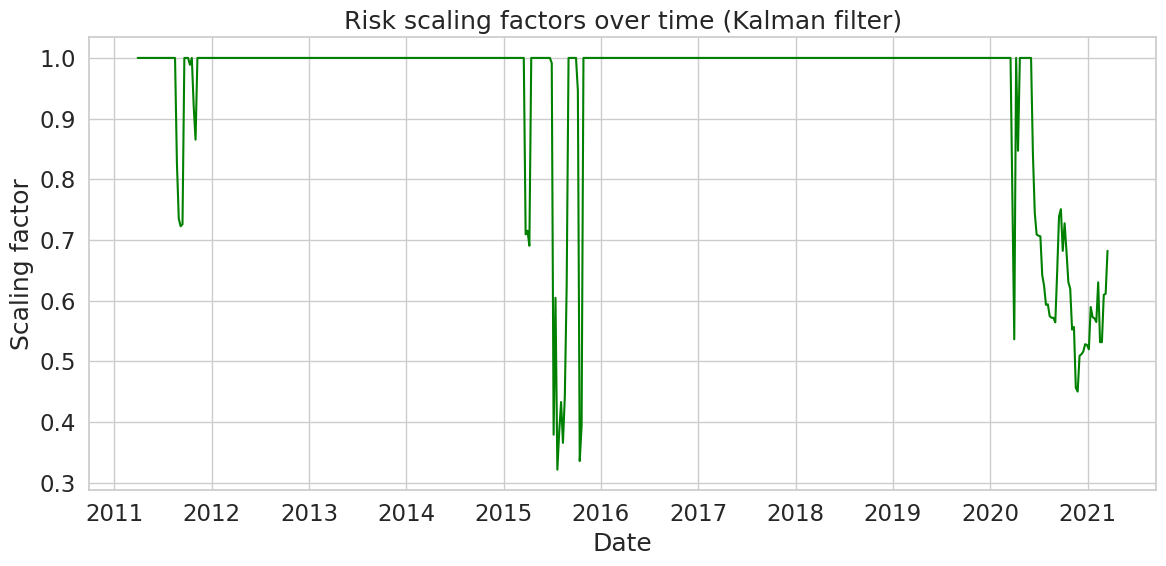

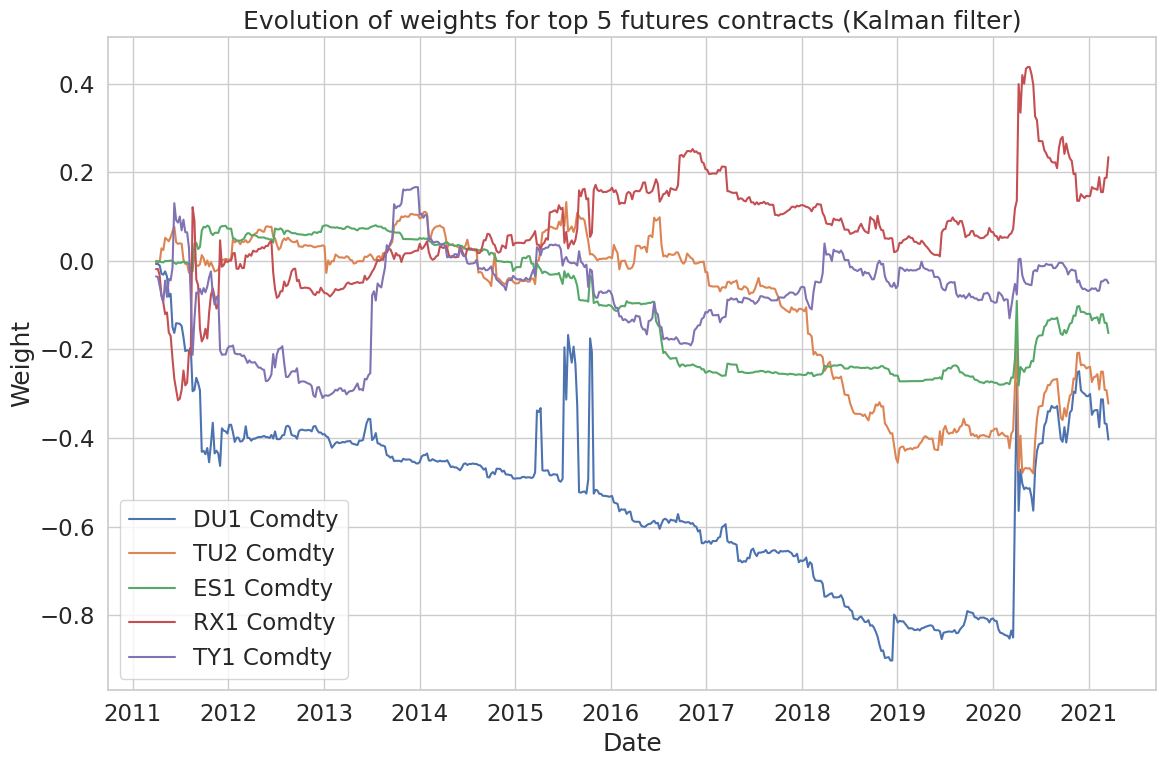

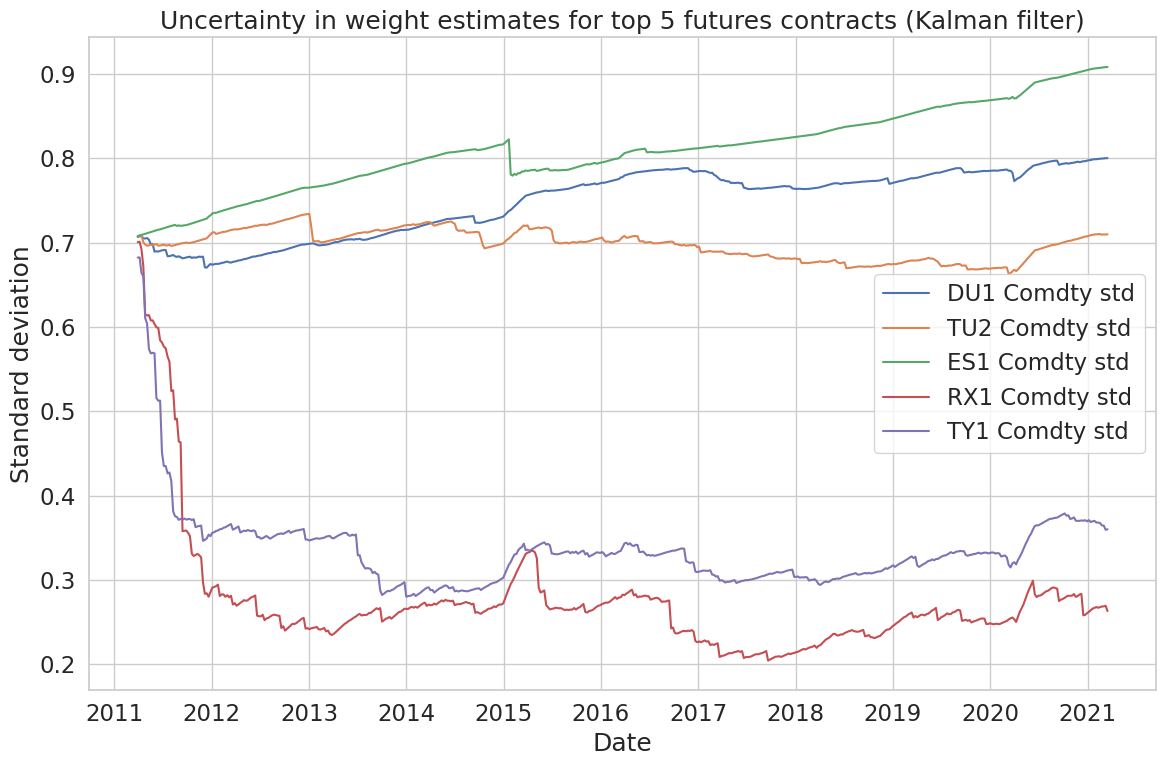

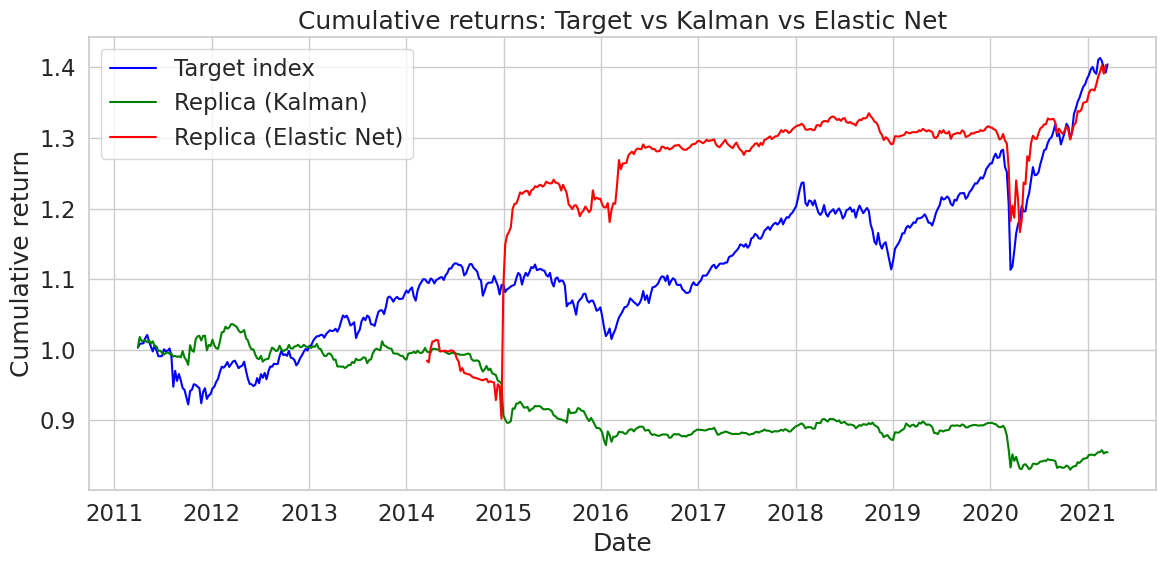

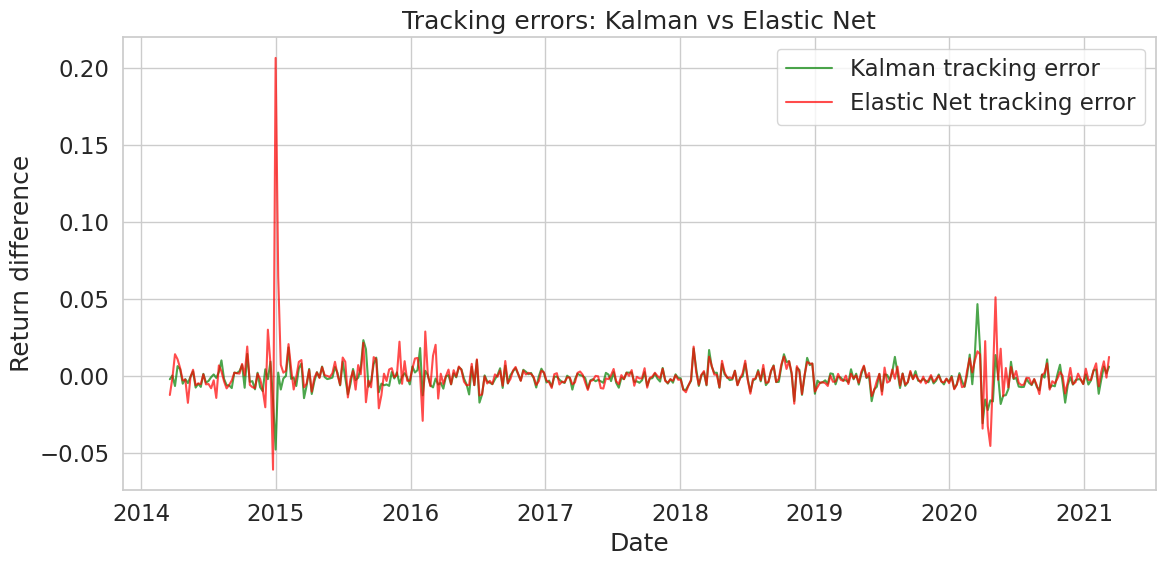

In [33]:
hyperparameters = optimize_kalman_filter_hyperparameters()

kalman_results_opt = run_optimized_kalman_filter_replication(
    **hyperparameters['best_params']
)

evaluate_kalman_filter(kalman_results_opt, futures_contracts)

# Simple Kalman Filter

In [34]:
# Add necessary imports at the top of your notebook
from pykalman import KalmanFilter
import scipy.stats as stats

class TransactionCostKalmanFilter(KalmanFilter):
    def __init__(self, transaction_cost=0.005, **kwargs):
        super().__init__(**kwargs)
        self.transaction_cost = transaction_cost
        self.previous_weights = None
        
    def filter_update(self, filtered_state_mean, filtered_state_covariance, observation=None):
        # Apply transaction cost penalty if we have previous weights
        if self.previous_weights is not None and self.transaction_cost > 0:
            # Calculate potential weight changes
            potential_changes = filtered_state_mean - self.previous_weights
            
            # Modify the observation matrix to include transaction costs
            H = self.observation_matrices
            adjusted_H = H - np.sign(potential_changes) * self.transaction_cost
            self.observation_matrices = adjusted_H

def run_improved_kalman_filter_replication(
    transaction_cost=0.005, 
    var_confidence=0.01, 
    var_horizon=4, 
    max_var_threshold=0.08,
    warm_up_periods=52,
    adapt_process_noise=True,
    use_elastic_net_init=True,
    penalize_transactions=True,
    use_cvar=True,
    regime_detection=True,
    smooth_scaling=True
):
    """
    Implement portfolio replication using an improved Kalman filter for dynamic weight estimation
    with proper transaction cost integration and risk management
    
    Parameters:
    transaction_cost (float): Transaction cost per unit of weight change
    var_confidence (float): Confidence level for VaR calculation
    var_horizon (int): Time horizon for VaR calculation in weeks
    max_var_threshold (float): Maximum acceptable VaR threshold
    warm_up_periods (int): Number of periods to use for initialization
    adapt_process_noise (bool): Whether to adapt process noise based on market volatility
    use_elastic_net_init (bool): Whether to use Elastic Net for initial weights
    penalize_transactions (bool): Whether to include transaction cost penalty in filtering
    use_cvar (bool): Whether to use CVaR instead of VaR
    regime_detection (bool): Whether to apply different parameters in different market regimes
    smooth_scaling (bool): Whether to use smooth scaling function rather than hard threshold
    
    Returns:
    dict: Dictionary containing performance metrics and time series data
    """
    # Ensure data is properly aligned
    y = target_returns_aligned  # Target index returns
    X = futures_returns.loc[y.index]  # Futures returns aligned with target
    
    # Convert to numpy arrays for easier indexing
    X_values = X.values
    y_values = y.values
    dates_array = X.index.to_numpy()
    
    # Initialize arrays to store results
    weights_history = []  # Store weights over time
    replica_returns = []  # Store replica portfolio returns
    target_dates = []  # Store dates for plotting
    gross_exposures = []  # Store gross exposure over time
    var_values = []  # Store VaR/CVaR values over time
    scaling_factors = []  # Store scaling factors applied
    transaction_costs_history = []  # Store transaction costs over time
    kalman_stds = []  # Store standard deviations of weight estimates
    market_regime = []  # Store detected market regime
    filter_gain = []  # Store Kalman filter gain
    
    # Initialize Kalman filter parameters
    n_features = X.shape[1]  # Number of futures contracts
    
    # Get improved initial weights if requested
    if use_elastic_net_init and len(X) > warm_up_periods:
        # Use Elastic Net for initial weights
        warm_up_X = X_values[:warm_up_periods]
        warm_up_y = y_values[:warm_up_periods]
        
        # Fit Elastic Net model
        alpha = 0.001
        l1_ratio = 0.5
        en = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, fit_intercept=False)
        en.fit(warm_up_X, warm_up_y)
        
        # Use the Elastic Net coefficients as initial weights
        initial_weights = en.coef_
        
        print(f"Using Elastic Net initialization with {sum(initial_weights != 0)} non-zero weights")
    else:
        # Start with zero weights
        initial_weights = np.zeros(n_features)
    
    # Initial state covariance - uncertainty in our initial estimate
    # Higher for more adaptive filter behavior
    initial_state_cov = np.eye(n_features) * 0.5
    
    # Base process noise covariance - how much weights can change over time
    base_process_noise = 0.001
    
    # Observation noise - measurement error in observed returns
    # Estimate from data
    if len(X) > warm_up_periods:
        # Use training data to estimate observation noise
        obs_residuals = warm_up_y - np.sum(warm_up_X * initial_weights, axis=1)
        observation_noise = np.var(obs_residuals)
        print(f"Estimated observation noise: {observation_noise:.6f}")
    else:
        observation_noise = 0.0001
    
    # Function to detect market regime
    def detect_market_regime(returns, window=12):
        if len(returns) < window:
            return "normal"
        
        recent_vol = np.std(returns[-window:])
        long_vol = np.std(returns)
        
        if recent_vol > 1.5 * long_vol:
            return "high_volatility"
        elif recent_vol < 0.5 * long_vol:
            return "low_volatility"
        else:
            return "normal"
    
    # Function to calculate VaR or CVaR
    def calculate_risk_metric(returns, confidence=0.01, horizon=4, use_cvar=False):
        if len(returns) < 8:
            return 0.05  # Default value when not enough data
            
        # Convert confidence to percentile (e.g., 0.01 -> 0.01 percentile)
        percentile = confidence
        
        # Scale returns for the specified horizon
        scaled_returns = np.array(returns) * np.sqrt(horizon)
        
        if use_cvar:
            # Calculate CVaR (Expected Shortfall)
            var_value = np.percentile(scaled_returns, percentile * 100)
            cvar_value = np.mean(scaled_returns[scaled_returns <= var_value])
            return abs(cvar_value)  # Return absolute value for easier comparison
        else:
            # Calculate VaR
            var_value = np.percentile(scaled_returns, percentile * 100)
            return abs(var_value)  # Return absolute value for easier comparison
    
    # Smooth scaling function
    def smooth_scale(risk_value, threshold, buffer_zone=0.02):
        if risk_value <= threshold - buffer_zone:
            return 1.0  # No scaling needed
        elif risk_value >= threshold:
            return threshold / risk_value  # Full scaling
        else:
            # Smooth transition in buffer zone
            buffer_pos = (threshold - risk_value) / buffer_zone
            return threshold / risk_value * (1 - buffer_pos) + buffer_pos
    
    # Calculate risk constraint for Kalman Filter
    def calculate_risk_constraint(weights, X_history, var_confidence, var_horizon, max_var_threshold, use_cvar, smooth_scaling):
        # Calculate historical returns with these weights
        historical_returns = np.dot(X_history, weights)
        
        # Calculate risk metric
        risk_value = calculate_risk_metric(
            historical_returns,
            confidence=var_confidence,
            horizon=var_horizon,
            use_cvar=use_cvar
        )
        
        # Determine scaling factor based on risk
        if risk_value > max_var_threshold:
            if smooth_scaling:
                scaling_factor = smooth_scale(risk_value, max_var_threshold)
            else:
                scaling_factor = max_var_threshold / risk_value
        else:
            scaling_factor = 1.0
            
        return scaling_factor, risk_value
    
    # Create a modified Kalman filter class that integrates transaction costs into the update
    class TransactionCostKalmanFilter(KalmanFilter):
        def __init__(self, transaction_cost=0.005, **kwargs):
            super().__init__(**kwargs)
            self.transaction_cost = transaction_cost
            self.previous_weights = None
            
        def filter_update(self, filtered_state_mean, filtered_state_covariance, observation=None):
            # Apply transaction cost penalty if we have previous weights
            if self.previous_weights is not None and self.transaction_cost > 0:
                # Calculate potential weight changes
                potential_changes = filtered_state_mean - self.previous_weights
                
                # Create transaction cost penalty matrix
                penalty_matrix = np.eye(len(filtered_state_mean)) * self.transaction_cost
                
                # Modify the observation matrix to include transaction costs
                # This effectively penalizes large weight changes
                H = self.observation_matrices
                adjusted_H = H - np.sign(potential_changes) * self.transaction_cost
                self.observation_matrices = adjusted_H
                
                # Perform the update
                updated_mean, updated_cov = super().filter_update(
                    filtered_state_mean, 
                    filtered_state_covariance, 
                    observation
                )
                
                # Restore original observation matrix
                self.observation_matrices = H
                
                # Store updated weights for next iteration
                self.previous_weights = updated_mean
                
                return updated_mean, updated_cov
            else:
                # For first update, just use standard update
                updated_mean, updated_cov = super().filter_update(
                    filtered_state_mean, 
                    filtered_state_covariance, 
                    observation
                )
                
                # Store updated weights for next iteration
                self.previous_weights = updated_mean
                
                return updated_mean, updated_cov
    
    # Initialize the modified Kalman filter with transaction costs
    kf = TransactionCostKalmanFilter(
        transaction_cost=transaction_cost if penalize_transactions else 0,
        initial_state_mean=initial_weights,
        initial_state_covariance=initial_state_cov,
        transition_matrices=np.eye(n_features),  # Identity for random walk
        observation_matrices=None,  # Will be set dynamically
        observation_covariance=observation_noise,
        transition_covariance=np.eye(n_features) * base_process_noise
    )
    
    previous_weights = initial_weights.copy()
    
    # Store historical X values for risk calculation
    X_history = np.zeros((0, n_features))
    
    # Loop through the data point by point
    for i in range(len(X) - 1):
        # Current features (returns of futures contracts)
        current_x = X_values[i].reshape(1, -1)
        
        # Add to history for risk calculation
        X_history = np.vstack([X_history, current_x])
        if len(X_history) > 52:  # Limit history to recent data
            X_history = X_history[-52:]
            
        # Target return for this period
        current_y = y_values[i]
        
        # Detect market regime if enabled
        if regime_detection and len(replica_returns) > 0:
            current_regime = detect_market_regime(replica_returns)
            market_regime.append(current_regime)
            
            # Adjust process noise based on regime
            if current_regime == "high_volatility":
                process_noise_factor = 3.0
            elif current_regime == "low_volatility":
                process_noise_factor = 0.5
            else:
                process_noise_factor = 1.0
                
            # Update transition covariance based on regime
            kf.transition_covariance = np.eye(n_features) * base_process_noise * process_noise_factor
        else:
            market_regime.append("normal")
            process_noise_factor = 1.0
        
        # Adapt process noise based on tracking error if enabled
        if adapt_process_noise and len(replica_returns) > 12:
            # Calculate tracking error volatility
            tracking_errors = np.array(replica_returns[-12:]) - y_values[i-12:i]
            tracking_vol = np.std(tracking_errors)
            
            # Increase process noise when tracking error is high, but limit changes
            process_noise_adaptive = min(
                max(base_process_noise * (1 + 5 * tracking_vol), base_process_noise * 0.5), 
                base_process_noise * 5.0
            )
            kf.transition_covariance = np.eye(n_features) * process_noise_adaptive * process_noise_factor
        
        # Set the observation matrix for this time step (current futures returns)
        kf.observation_matrices = current_x
        
        # IMPROVEMENT 4: Calculate risk-adjusted observation matrix
        # This integrates risk management directly into the Kalman filter
        if len(replica_returns) >= 12 and i > warm_up_periods:
            # Calculate expected risk for current weights
            predicted_weights = kf.transition_matrices @ previous_weights
            scaling_factor, risk_value = calculate_risk_constraint(
                predicted_weights, 
                X_history, 
                var_confidence, 
                var_horizon, 
                max_var_threshold, 
                use_cvar, 
                smooth_scaling
            )
            
            # Apply risk scaling to observation matrix
            # This effectively scales the impact of each asset's return
            risk_adjusted_x = current_x * scaling_factor
            kf.observation_matrices = risk_adjusted_x
            
            # Store risk value
            var_values.append(risk_value)
            scaling_factors.append(scaling_factor)
        else:
            var_values.append(np.nan)
            scaling_factors.append(1.0)
        
        # Standard Kalman filter update with integrated transaction costs
        if i == 0:
            # For the first observation, use the initial state
            filtered_state_means, filtered_state_covs = kf.filter_update(
                filtered_state_mean=initial_weights,
                filtered_state_covariance=initial_state_cov,
                observation=current_y
            )
        else:
            # For subsequent observations, use the previous filtered state
            filtered_state_means, filtered_state_covs = kf.filter_update(
                filtered_state_mean=filtered_state_means,
                filtered_state_covariance=filtered_state_covs,
                observation=current_y
            )
        
        # Store Kalman gain information
        # For simplicity, use the trace of the updated covariance matrix
        # relative to the predicted covariance as a proxy for the gain
        gain_proxy = np.trace(filtered_state_covs) / np.trace(initial_state_cov)
        filter_gain.append(gain_proxy)
        
        # Extract the updated weights
        current_weights = filtered_state_means
        
        # Extract standard deviations of weight estimates
        weight_stds = np.sqrt(np.diag(filtered_state_covs))
        kalman_stds.append(weight_stds)
        
        # Calculate gross exposure (sum of absolute weights)
        gross_exposure = np.sum(np.abs(current_weights))
        gross_exposures.append(gross_exposure)
        
        # Calculate transaction costs
        weight_changes = np.abs(current_weights - previous_weights)
        period_transaction_cost = np.sum(weight_changes) * transaction_cost
        transaction_costs_history.append(period_transaction_cost)
        
        # Store the weights
        weights_history.append(current_weights)
        
        # Update previous weights for next iteration
        previous_weights = current_weights.copy()
        
        # Calculate replica return for the next period (t+1)
        next_returns = X_values[i+1]  # This is t+1
        
        # Use current weights with next period returns
        replica_return = np.dot(next_returns, current_weights)
        
        # Subtract transaction costs from the return
        replica_return_after_costs = replica_return - period_transaction_cost
        
        replica_returns.append(replica_return_after_costs)
        
        # Store the date for t+1
        target_dates.append(dates_array[i+1])
    
    # Convert results to pandas series for easier analysis
    replica_returns_series = pd.Series(replica_returns, index=target_dates)
    
    # Calculate cumulative returns for both target and replica
    aligned_target = y.loc[replica_returns_series.index]
    cumulative_target = (1 + aligned_target).cumprod()
    cumulative_replica = (1 + replica_returns_series).cumprod()
    
    # Calculate performance metrics
    replica_mean_return = replica_returns_series.mean() * 52  # annualized
    target_mean_return = aligned_target.mean() * 52  # annualized
    
    replica_vol = replica_returns_series.std() * np.sqrt(52)  # annualized
    target_vol = aligned_target.std() * np.sqrt(52)  # annualized
    
    replica_sharpe = replica_mean_return / replica_vol if replica_vol > 0 else 0
    target_sharpe = target_mean_return / target_vol if target_vol > 0 else 0
    
    # Calculate tracking error
    tracking_error = (replica_returns_series - aligned_target).std() * np.sqrt(52)
    information_ratio = (replica_mean_return - target_mean_return) / tracking_error if tracking_error > 0 else 0
    
    # Calculate drawdowns
    replica_drawdown = 1 - cumulative_replica / cumulative_replica.cummax()
    target_drawdown = 1 - cumulative_target / cumulative_target.cummax()
    
    # Calculate correlation
    correlation = replica_returns_series.corr(aligned_target)
    
    # Calculate average gross exposure
    avg_gross_exposure = np.mean(gross_exposures)
    
    # Calculate average VaR (excluding NaN values)
    avg_var = np.nanmean(var_values)
    
    # Calculate average transaction costs
    avg_transaction_cost = np.mean(transaction_costs_history) * 52  # annualized
    
    # Determine weight stability (lower is more stable)
    weight_stability = np.mean([np.mean(np.abs(weights_history[i+1] - weights_history[i])) 
                               for i in range(len(weights_history)-1)])
    
    # Return all metrics and time series
    return {
        'method': 'Improved Kalman Filter',
        'replica_return': replica_mean_return,
        'target_return': target_mean_return,
        'replica_vol': replica_vol,
        'target_vol': target_vol,
        'replica_sharpe': replica_sharpe,
        'target_sharpe': target_sharpe,
        'tracking_error': tracking_error,
        'information_ratio': information_ratio,
        'correlation': correlation,
        'max_drawdown': replica_drawdown.max(),
        'avg_gross_exposure': avg_gross_exposure,
        'avg_var': avg_var,
        'avg_transaction_cost': avg_transaction_cost,
        'weight_stability': weight_stability,
        'replica_returns': replica_returns_series,
        'aligned_target': aligned_target,
        'cumulative_replica': cumulative_replica,
        'cumulative_target': cumulative_target,
        'gross_exposures': gross_exposures,
        'var_values': var_values,
        'scaling_factors': scaling_factors,
        'weights_history': weights_history,
        'weight_stds': kalman_stds,
        'market_regime': market_regime,
        'filter_gain': filter_gain,
        'optimized': True
    }

# Function to evaluate and visualize Kalman filter results
def evaluate_kalman_filter(result, futures_contracts):
    """
    Evaluate and visualize the results of the Kalman filter replication
    
    Parameters:
    result (dict): Dictionary of results from run_kalman_filter_replication
    futures_contracts (list): List of futures contract names
    """
    # Create detailed metrics table
    metrics = pd.DataFrame({
        'Metric': ['Annualized return', 'Annualized volatility', 'Sharpe ratio',
                  'Max Drawdown', 'Tracking Error', 'Information ratio',
                  'Correlation', 'Average gross exposure', 'Average VaR (1%, 1M)'],
        'Target': [f"{result['target_return']*100:.2f}%",
                  f"{result['target_vol']*100:.2f}%",
                  f"{result['target_sharpe']:.2f}",
                  f"{result['max_drawdown']*100:.2f}%",
                  "N/A",
                  "N/A",
                  "N/A",
                  "N/A",
                  "N/A"],
        'Replica (Kalman)': [f"{result['replica_return']*100:.2f}%",
                           f"{result['replica_vol']*100:.2f}%",
                           f"{result['replica_sharpe']:.2f}",
                           f"{result['max_drawdown']*100:.2f}%",
                           f"{result['tracking_error']*100:.2f}%",
                           f"{result['information_ratio']:.2f}",
                           f"{result['correlation']:.4f}",
                           f"{result['avg_gross_exposure']:.4f}",
                           f"{result['avg_var']*100:.2f}%"]
    })
    
    print("\nDetailed metrics for the Kalman filter replication:")
    display(metrics)
    
    # Plot cumulative returns
    plt.figure(figsize=(12, 6))
    plt.plot(result['cumulative_target'], label='Target index', color='blue')
    plt.plot(result['cumulative_replica'], label='Replica portfolio (Kalman)', color='green')
    plt.title('Cumulative returns: target vs Kalman filter replica')
    plt.xlabel('Date')
    plt.ylabel('Cumulative return')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    # Plot drawdowns
    plt.figure(figsize=(12, 6))
    target_drawdown = 1 - result['cumulative_target'] / result['cumulative_target'].cummax()
    replica_drawdown = 1 - result['cumulative_replica'] / result['cumulative_replica'].cummax()
    plt.plot(target_drawdown, label='Target index', color='blue')
    plt.plot(replica_drawdown, label='Replica portfolio (Kalman)', color='green')
    plt.title('Drawdowns: target vs Kalman filter replica')
    plt.xlabel('Date')
    plt.ylabel('Drawdown')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    # Plot gross exposure over time
    plt.figure(figsize=(12, 6))
    gross_exposure_series = pd.Series(result['gross_exposures'], index=result['replica_returns'].index)
    plt.plot(gross_exposure_series, color='purple')
    plt.title('Gross exposure over time (Kalman filter)')
    plt.xlabel('Date')
    plt.ylabel('Gross exposure')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    # Plot VaR over time
    plt.figure(figsize=(12, 6))
    var_series = pd.Series(result['var_values'], index=result['replica_returns'].index)
    plt.plot(var_series, color='orange')
    plt.axhline(y=max_var_threshold, color='r', linestyle='--', label=f'VaR threshold ({max_var_threshold*100}%)')
    plt.title('Value at Risk (VaR) over time (Kalman filter)')
    plt.xlabel('Date')
    plt.ylabel('VaR (1%, 1M)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    # Plot scaling factors over time
    plt.figure(figsize=(12, 6))
    scaling_series = pd.Series(result['scaling_factors'], index=result['replica_returns'].index)
    plt.plot(scaling_series, color='green')
    plt.title('Risk scaling factors over time (Kalman filter)')
    plt.xlabel('Date')
    plt.ylabel('Scaling factor')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    # Plot weight evolution over time for top contracts
    weights_array = np.array(result['weights_history'])
    weights_df = pd.DataFrame(weights_array, index=result['replica_returns'].index, columns=futures_contracts)
    
    # Find contracts with highest average absolute weight
    avg_abs_weights = weights_df.abs().mean().sort_values(ascending=False)
    top_contracts = avg_abs_weights.head(5).index.tolist()
    
    plt.figure(figsize=(12, 8))
    for contract in top_contracts:
        plt.plot(weights_df[contract], label=contract)
    
    plt.title('Evolution of weights for top 5 futures contracts (Kalman filter)')
    plt.xlabel('Date')
    plt.ylabel('Weight')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    # Plot weight uncertainty (std dev) for top contracts
    weight_stds_array = np.array(result['weight_stds'])
    weight_stds_df = pd.DataFrame(weight_stds_array, index=result['replica_returns'].index, columns=futures_contracts)
    
    plt.figure(figsize=(12, 8))
    for contract in top_contracts:
        plt.plot(weight_stds_df[contract], label=f'{contract} std')
    
    plt.title('Uncertainty in weight estimates for top 5 futures contracts (Kalman filter)')
    plt.xlabel('Date')
    plt.ylabel('Standard deviation')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    # Compare Kalman filter with best Elastic Net
    if 'best_config_normalized' in globals():
        plt.figure(figsize=(12, 6))
        plt.plot(result['cumulative_target'], label='Target index', color='blue')
        plt.plot(result['cumulative_replica'], label='Replica (Kalman)', color='green')
        plt.plot(best_config_normalized['cumulative_replica'], label='Replica (Elastic Net)', color='red')
        plt.title('Cumulative returns: Target vs Kalman vs Elastic Net')
        plt.xlabel('Date')
        plt.ylabel('Cumulative return')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()
        
        # Calculate tracking error difference
        common_dates = result['replica_returns'].index.intersection(best_config_normalized['replica_returns'].index)
        kalman_vs_target = result['replica_returns'].loc[common_dates] - result['aligned_target'].loc[common_dates]
        elastic_vs_target = best_config_normalized['replica_returns'].loc[common_dates] - best_config_normalized['aligned_target'].loc[common_dates]
        
        plt.figure(figsize=(12, 6))
        plt.plot(kalman_vs_target, label='Kalman tracking error', color='green', alpha=0.7)
        plt.plot(elastic_vs_target, label='Elastic Net tracking error', color='red', alpha=0.7)
        plt.title('Tracking errors: Kalman vs Elastic Net')
        plt.xlabel('Date')
        plt.ylabel('Return difference')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

Running Kalman filter replication...

Detailed metrics for the Kalman filter replication:


,Metric,Target,Replica (Kalman)
0,Annualized return,3.56%,-0.99%
1,Annualized volatility,5.76%,4.22%
2,Sharpe ratio,0.62,-0.23
3,Max Drawdown,21.40%,21.40%
4,Tracking Error,N/A,5.71%
5,Information ratio,N/A,-0.80
6,Correlation,N/A,0.3775
7,Average gross exposure,N/A,0.9488
8,"Average VaR (1%, 1M)",N/A,2.75%


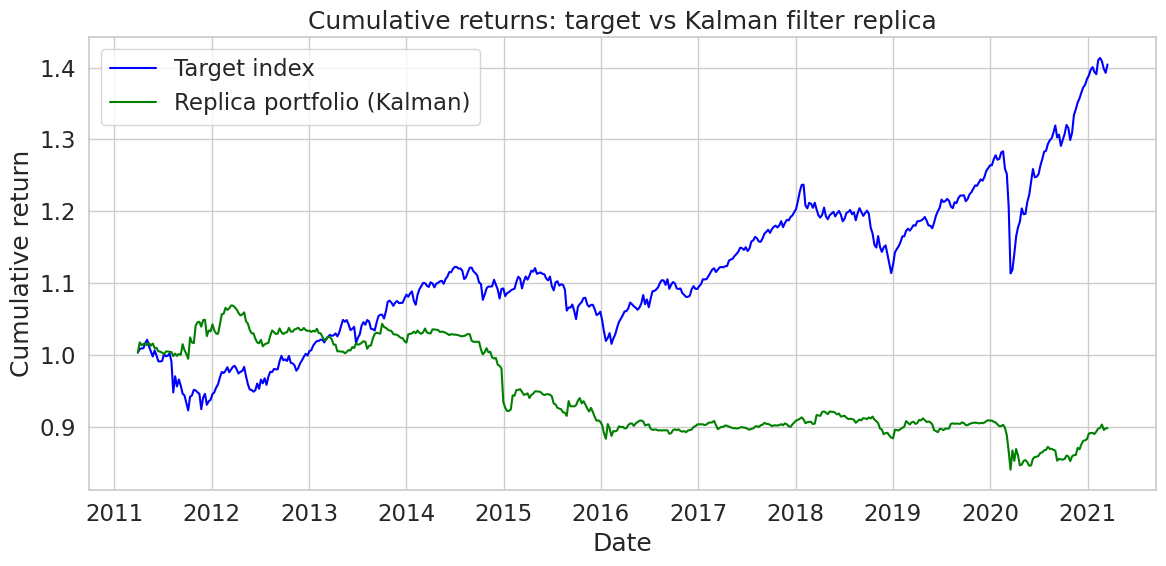

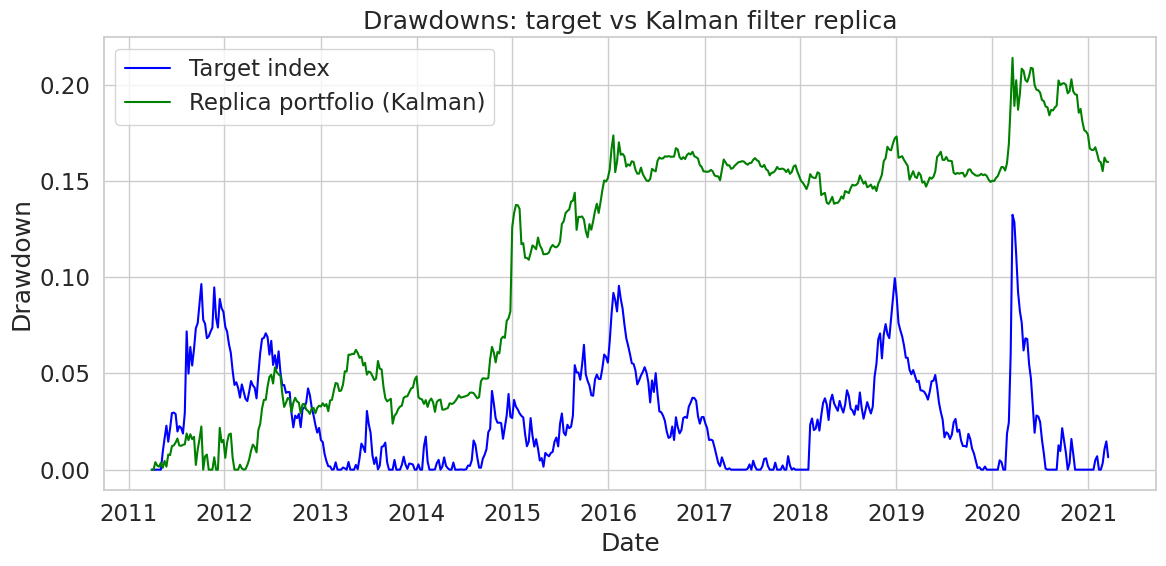

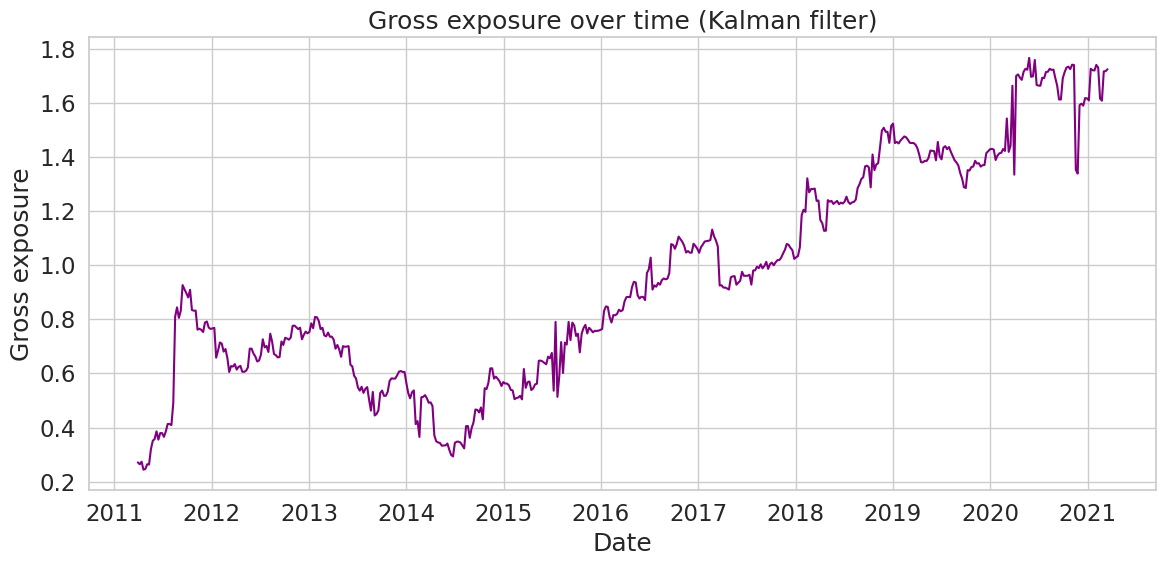

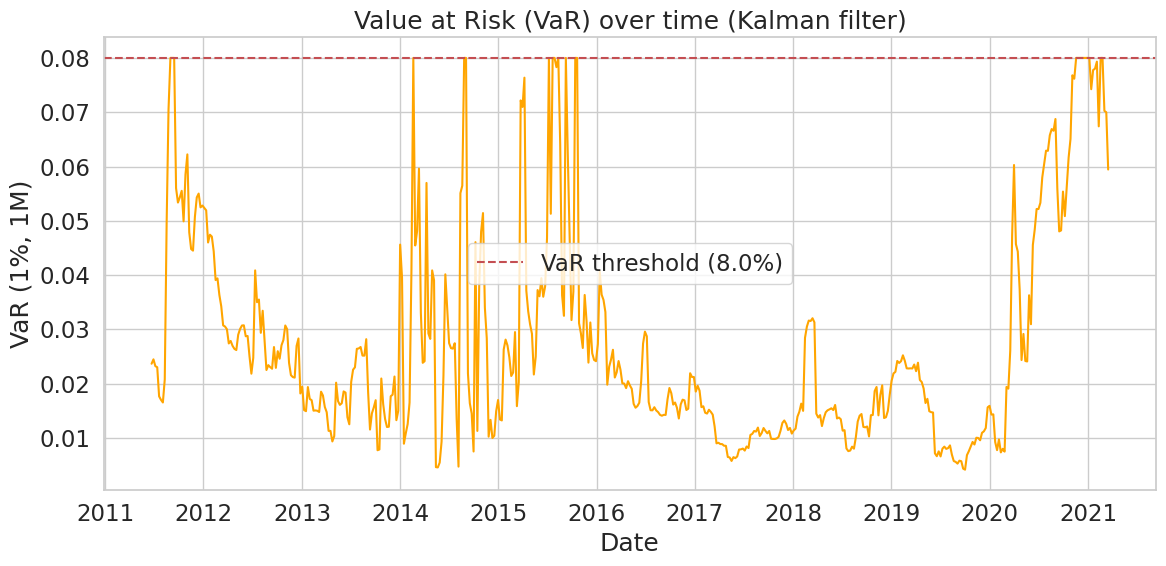

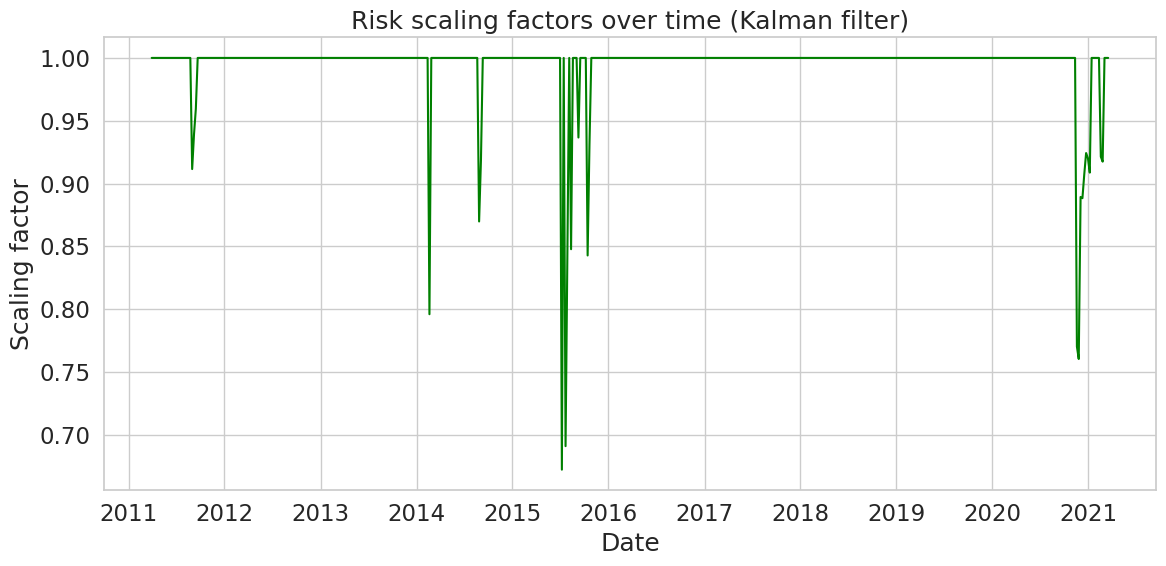

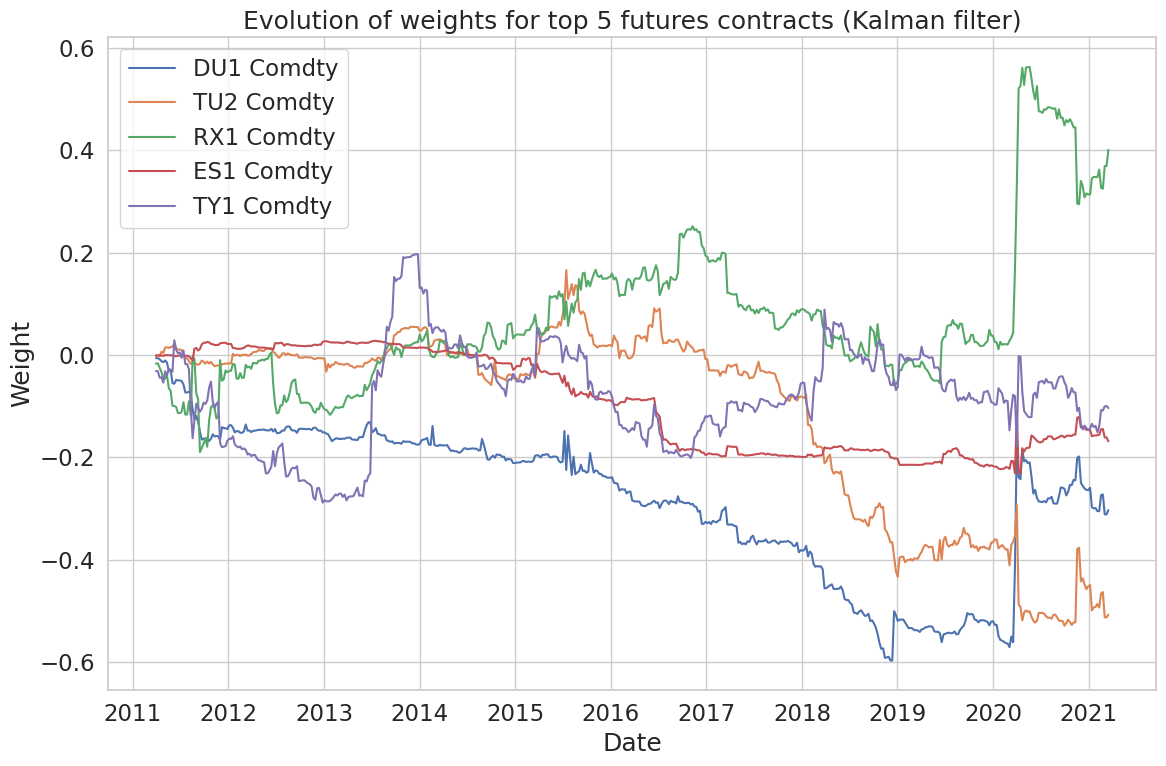

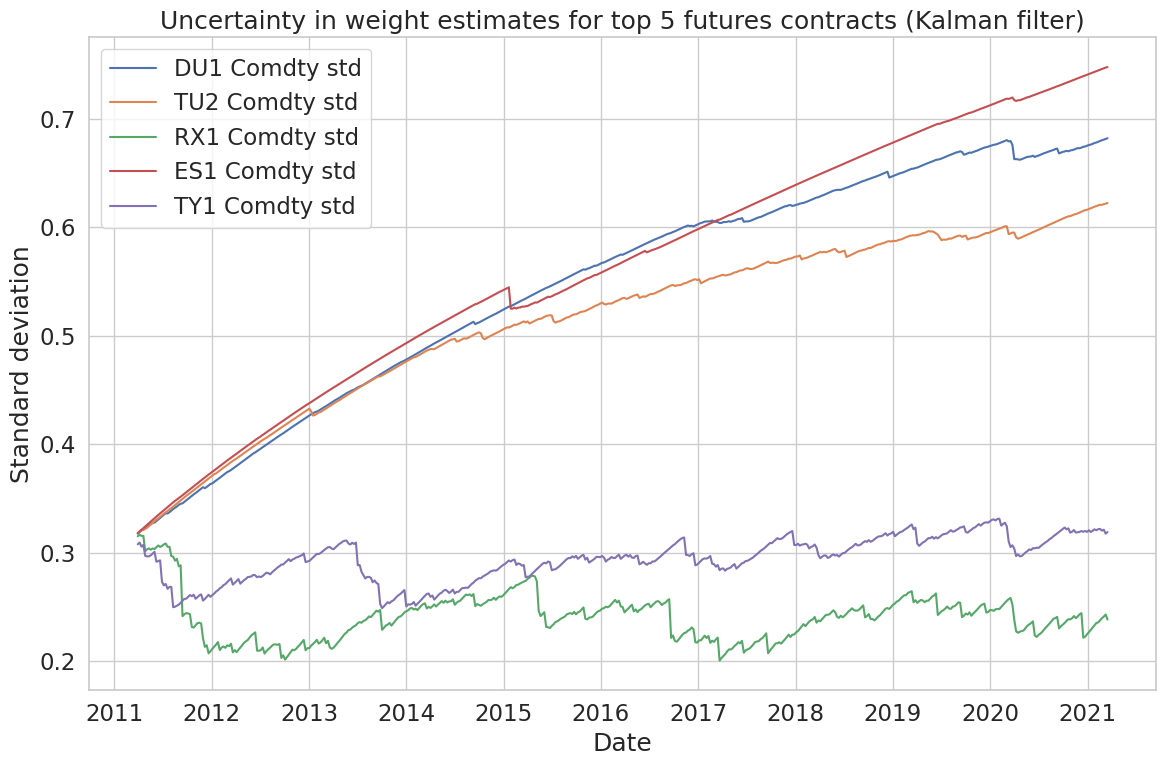

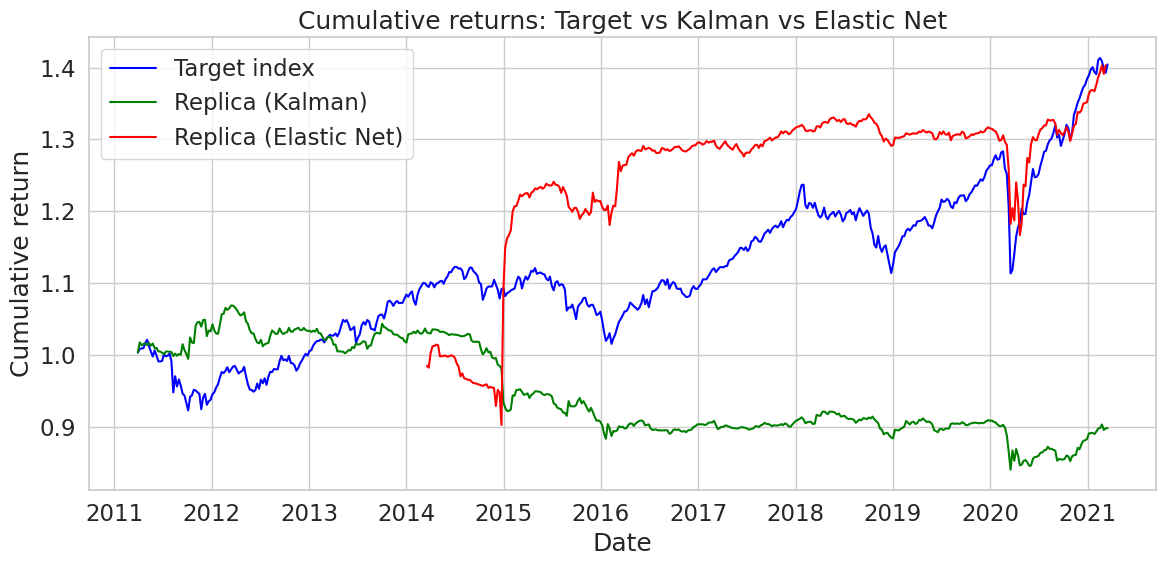

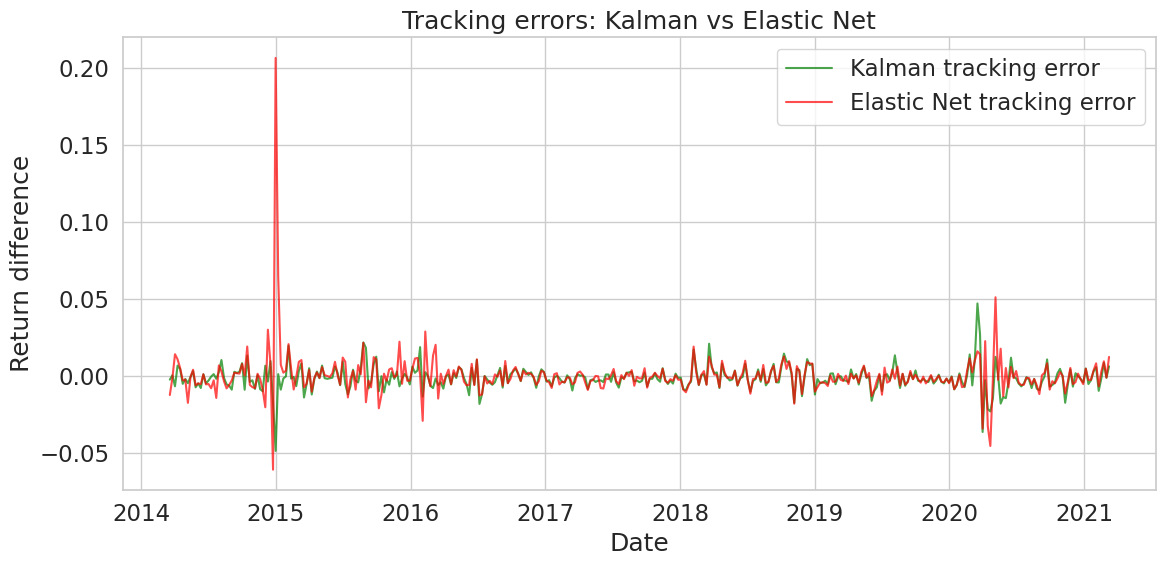

In [35]:
# Run the Kalman filter replication
print("Running Kalman filter replication...")
kalman_result = run_kalman_filter_replication(
    transaction_cost=0.005,
    var_confidence=0.01,
    var_horizon=4,
    max_var_threshold=0.08
)

# Evaluate and visualize the Kalman filter results
evaluate_kalman_filter(kalman_result, futures_contracts)
